# Read the data

In [3]:
from constants import *
import pandas as pd
from functions import *


# symbol = 'AAPL'
# day = '20120924'
# fname = PROCESSEDDATAFOLDER + symbol + "_" + day + "_profile.csv"
# print(fname)
# df = pd.read_csv(fname)

time = pd.to_datetime('14:33:00')
print(time)

filePath = "./Data/wholeData.csv"
for i, chunk in enumerate(pd.read_csv(filePath, chunksize=390)):
    chunk.to_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv", index=False)
    df = pd.read_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv")
    df.loc[-1] = df.loc[0]
    df.index = df.index + 1
    df = df.sort_index()
    df.loc[chunk.shape[0]+1] = df.loc[390]
    df['Volume'] = df['Volume'].astype(int)
    df.to_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv", index=False)
    
    
    
    
# df = pd.read_csv(PROCESSEDDATAFOLDER + "AAPL_" + '20121008' +"_profile.csv")
# df.columns = ["Time", "Volume", "Price", 'date']
# print(df)
    


2022-10-27 14:33:00


In [4]:
import sys

sys.argv[0] = 'volume_prediction.py'
# sys.argv[1] = 'cross_val'
sys.argv[1] = 'simulation'

print(sys.argv[1])

simulation


$ \mathbf{E}[S]+\lambda\mathbf{var}[S] $

# Cross-validation of b + Risk-aversion display of $\lambda$

In [12]:
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

if __name__ == '__main__':
    # constants
    W = 20
    f = 1

    def usage():
        print "Usage:\n%s [cross_val|simulation]" % sys.argv[0]

    if len(sys.argv) < 2:
        usage()

    if sys.argv[1] == 'cross_val':

        CV_LEN = 10
        total_df = load_data(ALL_DAYS[:W + CV_LEN], ignore_auctions=True,
                             correct_zero_volumes=True, num_minutes_interval=1)

        lambdas = [np.inf]
        for b in [1]:   # original range(1, 10)
            
            print("b is %d" %b)
            rolling_simulator(total_df, lambdas, W, analyze_day,
                              volume_model_meta_params={'num_factors': f, 'bandwidth': b})

            total_df['DynamicSolinf_b_%d' % b] = total_df.DynamicSolinf

        fname = SAVEFOLDER + 'result_cross_validation_b.pickle'
        logger.info("\ngzipping and pickling results -> %s" % fname)
        print fname
        test_days = total_df.Day.unique()[W:]
        tested_dataset = total_df[total_df.Day.isin(test_days)]
        with gzip.open(fname, 'w') as f:
            pickle.dump(tested_dataset, f)

    elif sys.argv[1] == 'simulation':

        total_df = load_data(ALL_DAYS[30:], ignore_auctions=True,
                             correct_zero_volumes=True, num_minutes_interval=1)

        b = 1  # chosen via CV
        lambdas = [0., 1., 10., 100., 1000., np.inf]
        

        rolling_simulator(total_df, lambdas, W, analyze_day,
                          volume_model_meta_params={'num_factors': f, 'bandwidth': b})

        # extract results
        fname = SAVEFOLDER + 'result_f_%d_b_%d_W_20_days.pickle' % (f, b)
        logger.info("\ngzipping and pickling results -> %s" % fname)
        print fname
        test_days = total_df.Day.unique()[W:]
        tested_dataset = total_df[total_df.Day.isin(test_days)]
        with gzip.open(fname, 'w') as f:
            pickle.dump(tested_dataset, f)
    else:
        usage()

2022-09-09 13:27:13,006 - INFO - Loading data for days:['20220516', '20220517', '20220518', '20220519', '20220520', '20220523', '20220524', '20220525', '20220526', '20220527', '20220531', '20220601', '20220602', '20220603', '20220606', '20220607', '20220608', '20220609', '20220610', '20220613', '20220614', '20220615', '20220616', '20220617', '20220621', '20220622', '20220623', '20220624', '20220627', '20220628']
2022-09-09 13:27:14,310 - INFO - Working on testing day20220614
2022-09-09 13:27:14,314 - INFO - Using as training set: ['20220516' '20220517' '20220518' '20220519' '20220520' '20220523'
 '20220524' '20220525' '20220526' '20220527' '20220531' '20220601'
 '20220602' '20220603' '20220606' '20220607' '20220608' '20220609'
 '20220610' '20220613']
2022-09-09 13:27:14,315 - INFO - Fitting static volume model..
2022-09-09 13:27:14,363 - INFO - Fitting log-normal volume model..
volume_estimation.py:119: FutureWarning: Method .as_matrix will be removed in a future version. Use .values i

[-0.0238426  0.       ]
[-0.21114641  0.0022519 ]
[-0.53465371  0.00570227]
[-0.85681417  0.00913823]
[-0.97937002  0.01044533]
[-0.00816571  0.        ]
[-0.07255616  0.00080664]
[-0.22765322  0.00253103]
[-0.4847734   0.00538967]
[-0.80350262  0.00893327]
[-0.00721553  0.        ]
[-0.06155527  0.00075128]
[-0.21464727  0.00261992]
[-0.51848582  0.00632848]
[-0.84979483  0.01037234]
[-0.0077134  0.       ]
[-0.06675471  0.00077674]
[-0.24868287  0.00289378]
[-0.65707329  0.00764598]
[-0.93301264  0.01085693]
[-0.00700622  0.        ]
[-0.05213108  0.00061935]
[-0.1791075   0.00212805]
[-0.55422707  0.00658501]
[-0.90508982  0.01075375]
[-0.00731755  0.        ]
[-0.04676979  0.00057876]
[-0.13151887  0.00162768]
[-0.36703205  0.00454239]
[-0.75058408  0.00928923]
[-0.00669195  0.        ]
[-0.04284827  0.00052352]
[-0.118164    0.00144387]
[-0.32619303  0.00398583]
[-0.70640947  0.00863179]
[-0.00611172  0.        ]
[-0.03864721  0.00048256]
[-0.10526329  0.0013145 ]
[-0.28570707  0.

[-0.00409803  0.        ]
[-0.02694782  0.00029475]
[-0.06185658  0.00067678]
[-0.157523    0.00172348]
[-0.43549798  0.00476485]
[-0.00420528  0.        ]
[-0.02778666  0.00030576]
[-0.0629779   0.00069323]
[-0.14834912  0.00163296]
[-0.36580353  0.0040266 ]
[-0.00422916  0.        ]
[-0.02845931  0.00031369]
[-0.06578143  0.00072529]
[-0.15934909  0.00175695]
[-0.42731935  0.00471155]
[-0.00372911  0.        ]
[-0.02542112  0.00028045]
[-0.05886074  0.00064958]
[-0.13683198  0.00151006]
[-0.35927697  0.00396494]
[-0.00336869  0.        ]
[-0.0231683   0.00025802]
[-0.05423139  0.00060416]
[-0.12375771  0.00137872]
[-0.3211596   0.00357787]
[-0.00435665  0.        ]
[-0.03037661  0.00033853]
[-0.07203462  0.00080308]
[-0.16341285  0.0018218 ]
[-0.42384338  0.00472521]
[-0.00385122  0.        ]
[-0.0272803   0.00030463]
[-0.06559972  0.00073278]
[-0.14502579  0.00162002]
[-0.37959925  0.00424033]
[-0.00404364  0.        ]
[-0.02913598  0.00032477]
[-0.07117744  0.00079368]
[-0.15444936

[-0.35424009  0.00371565]
[-0.00376911  0.        ]
[-0.03875992  0.00040736]
[-0.1096873   0.00115381]
[-0.189525    0.00199364]
[-0.33194697  0.00349179]
[-0.00359027  0.        ]
[-0.03810911  0.00040114]
[-0.11567065  0.00121864]
[-0.2102377   0.00221494]
[-0.3558076   0.00374858]
[-0.00382502  0.        ]
[-0.04190528  0.00044165]
[-0.13753733  0.00145082]
[-0.27002432  0.00284836]
[-0.46153503  0.00486852]
[-0.00417808  0.        ]
[-0.04738454  0.00049968]
[-0.17155154  0.00181066]
[-0.3831574   0.00404408]
[-0.73990437  0.00780941]
[-0.00424532  0.        ]
[-0.04820798  0.00050839]
[-0.18829475  0.00198759]
[-0.41615064  0.00439278]
[-0.75472229  0.00796666]
[-0.00376051  0.        ]
[-0.04241106  0.00044832]
[-0.18244395  0.00193052]
[-0.40971026  0.00433533]
[-0.5279599   0.00558658]
[-0.00340758  0.        ]
[-0.03987786  0.00042178]
[-0.20048821  0.00212263]
[-0.61754707  0.00653815]
[-0.92075581  0.00974831]
[-0.00370581  0.        ]
[-0.03334815  0.00035265]
[-0.15511879

[-0.07617813  0.00085701]
[-0.20358185  0.0022903 ]
[-0.40701806  0.00457897]
[-0.00362141  0.        ]
[-0.02700157  0.00030227]
[-0.08463808  0.00095302]
[-0.24259668  0.00273163]
[-0.44183026  0.00497499]
[-0.00379187  0.        ]
[-0.02887126  0.00032337]
[-0.09571278  0.00107829]
[-0.32675031  0.00368114]
[-0.75243476  0.00847687]
[-0.00329662  0.        ]
[-0.02377361  0.00026651]
[-0.07205646  0.00081291]
[-0.22435347  0.00253105]
[-0.67396416  0.00760336]
[-0.00344944  0.        ]
[-0.02353167  0.00026398]
[-0.06246568  0.00070557]
[-0.11655784  0.00131657]
[-0.30476127  0.0034424 ]
[-0.00347379  0.        ]
[-0.02393914  0.00026859]
[-0.06442832  0.00072792]
[-0.10804224  0.00122068]
[-0.19621938  0.00221692]
[-0.0038699  0.       ]
[-0.02718841  0.00030527]
[-0.07616068  0.00086112]
[-0.1316643   0.00148868]
[-0.24274024  0.00274457]
[-0.00385583  0.        ]
[-0.02766606  0.0003105 ]
[-0.08100834  0.00091555]
[-0.14226733  0.0016079 ]
[-0.23609946  0.00266838]
[-0.00408616  

[-0.2513323   0.00272847]
[-0.00492882  0.        ]
[-0.02183482  0.00022966]
[-0.04157876  0.00045221]
[-0.09431965  0.00102586]
[-0.26921896  0.00292813]
[-0.00512018  0.        ]
[-0.0229895   0.00024179]
[-0.04398938  0.00047845]
[-0.09909489  0.00107784]
[-0.29522722  0.00321113]
[-0.00541353  0.        ]
[-0.02462712  0.00025845]
[-0.04696765  0.00050978]
[-0.10120573  0.0010985 ]
[-0.29520204  0.00320417]
[-0.00522179  0.        ]
[-0.02404864  0.00025225]
[-0.04549056  0.00049359]
[-0.09009445  0.0009776 ]
[-0.2224239   0.00241349]
[-0.00470825  0.        ]
[-0.02203538  0.0002311 ]
[-0.0420659   0.00045642]
[-0.08198282  0.00088957]
[-0.18825168  0.00204265]
[-0.00473922  0.        ]
[-0.0225298   0.00023639]
[-0.04361917  0.00047353]
[-0.0857818   0.00093129]
[-0.1956035   0.00212357]
[-0.00496753  0.        ]
[-0.02401473  0.00025193]
[-0.04723823  0.00051274]
[-0.09443401  0.00102506]
[-0.21906796  0.00237793]
[-0.00635632  0.        ]
[-0.03127049  0.00032795]
[-0.06249433

[-0.01165701  0.        ]
[-0.02001707  0.0001578 ]
[-0.03873764  0.00042364]
[-0.10320716  0.00113958]
[-0.29168576  0.0032207 ]
[-0.01176141  0.        ]
[-0.02024758  0.00015927]
[-0.03897507  0.00042619]
[-0.10265603  0.00113373]
[-0.28958928  0.00319821]
[-0.01392888  0.        ]
[-0.02404305  0.00018881]
[-0.04604441  0.00050376]
[-0.11971787  0.00132325]
[-0.33553582  0.0037087 ]
[-0.01245694  0.        ]
[-0.0215757   0.00016914]
[-0.0410828   0.00044984]
[-0.1051356   0.00116345]
[-0.29745887  0.00329174]
[-0.01246471  0.        ]
[-0.02162919  0.00016911]
[-0.04073096  0.000446  ]
[-0.10006322  0.00110783]
[-0.2581227   0.00285775]
[-0.01213921  0.        ]
[-0.02116963  0.00016534]
[-0.03994216  0.00043764]
[-0.09804283  0.00108643]
[-0.24594567  0.00272537]
[-0.01250699  0.        ]
[-0.02194894  0.00017106]
[-0.04166816  0.00045595]
[-0.10380186  0.00114892]
[-0.26321134  0.00291332]
[-0.01183068  0.        ]
[-0.02089891  0.00016261]
[-0.0399295   0.00043657]
[-0.10126424

2022-09-09 13:27:36,216 - INFO - Working on testing day20220615
2022-09-09 13:27:36,222 - INFO - Using as training set: ['20220517' '20220518' '20220519' '20220520' '20220523' '20220524'
 '20220525' '20220526' '20220527' '20220531' '20220601' '20220602'
 '20220603' '20220606' '20220607' '20220608' '20220609' '20220610'
 '20220613' '20220614']
2022-09-09 13:27:36,224 - INFO - Fitting static volume model..



[-0.06566302  0.00048601]
[-0.23591703  0.00255658]
[-0.45000822  0.00497297]
[-0.56465847  0.0062401 ]
[-0.02445742  0.        ]
[-0.06094976  0.00044992]
[-0.2666659   0.00288414]
[-0.69241047  0.00763719]
[-0.94378181  0.01041004]
[-0.02502832  0.        ]
[-0.04903177  0.00030393]
[-0.20513268  0.00218071]
[-0.66598483  0.00733101]
[-0.9491018   0.01044837]
[-0.03192596  0.        ]
[-0.04138019  0.00014695]
[-0.0934512   0.00090625]
[-0.20436431  0.00224407]
[-0.43727949  0.00480651]
[-0.02932735  0.        ]
[-0.03814557  0.00013366]
[-0.08923325  0.00086205]
[-0.20391348  0.00223833]
[-0.44605797  0.00490186]
[-0.0296429  0.       ]
[-0.038515    0.00013199]
[-0.09217048  0.00088511]
[-0.21168353  0.00232291]
[-0.39384086  0.00432761]
[-0.02905303  0.        ]
[-0.03787796  0.00012821]
[-0.09437636  0.00090367]
[-0.23362663  0.00256456]
[-0.40034489  0.0044011 ]
[-0.03255937  0.        ]
[-0.04259616  0.00014233]
[-0.1109618   0.00105899]
[-0.30727796  0.00337246]
[-0.48211035 

2022-09-09 13:27:36,258 - INFO - Fitting log-normal volume model..
2022-09-09 13:27:36,289 - INFO - Building volume predictor..
2022-09-09 13:27:37,625 - INFO - Processing AAPL - 20220615


[-0.02392561  0.        ]
[-0.21365281  0.00227915]
[-0.53976056  0.00575808]
[-0.85922267  0.00916605]
[-0.97977987  0.01045214]
[-0.00808501  0.        ]
[-0.07163371  0.00081118]
[-0.22629573  0.0025627 ]
[-0.48148861  0.00545266]
[-0.80395255  0.00910443]
[-0.00716053  0.        ]
[-0.06348103  0.00074382]
[-0.22352457  0.00261925]
[-0.52927294  0.006202  ]
[-0.85407861  0.01000806]
[-0.00768919  0.        ]
[-0.06618238  0.00078865]
[-0.25053248  0.00298564]
[-0.66064757  0.00787306]
[-0.93429631  0.01113418]
[-0.00701227  0.        ]
[-0.05191182  0.00062368]
[-0.18184492  0.00218492]
[-0.56272535  0.00676132]
[-0.90847059  0.01091556]
[-0.00740277  0.        ]
[-0.04634909  0.00058565]
[-0.13230044  0.00167194]
[-0.37367395  0.00472227]
[-0.75794442  0.00957846]
[-0.00670019  0.        ]
[-0.04091512  0.00053125]
[-0.11406094  0.00148125]
[-0.32040865  0.00416099]
[-0.70300274  0.00912955]
[-0.0062972  0.       ]
[-0.03784573  0.00050201]
[-0.1036202   0.00137475]
[-0.28354478  

[-0.02170364  0.0003087 ]
[-0.05236024  0.00074568]
[-0.14468443  0.0020605 ]
[-0.35547341  0.00506241]
[-0.00513605  0.        ]
[-0.02327737  0.00033151]
[-0.05690286  0.00081142]
[-0.16434928  0.00234357]
[-0.44010953  0.00627583]
[-0.00333611  0.        ]
[-0.01518219  0.00021676]
[-0.03685255  0.00052683]
[-0.10586387  0.00151338]
[-0.29613244  0.00423336]
[-0.00330551  0.        ]
[-0.01509674  0.00021521]
[-0.0364255   0.00051995]
[-0.1030491   0.00147095]
[-0.27589799  0.00393823]
[-0.00471439  0.        ]
[-0.0216213   0.00030916]
[-0.05226478  0.00074832]
[-0.14923732  0.00213675]
[-0.40291808  0.00576889]
[-0.003781  0.      ]
[-0.01743241  0.00024915]
[-0.04190937  0.00059979]
[-0.11881478  0.00170044]
[-0.32626847  0.00466944]
[-0.00465203  0.        ]
[-0.02156501  0.00030732]
[-0.0515601   0.00073575]
[-0.1439671   0.00205436]
[-0.37834707  0.00539889]
[-0.00504719  0.        ]
[-0.02348918  0.00033461]
[-0.05554753  0.00079235]
[-0.14991035  0.00213836]
[-0.3398704   0.

[-0.13547348  0.00192631]
[-0.26331899  0.00374415]
[-0.00368715  0.        ]
[-0.03165017  0.00044878]
[-0.08904954  0.00126545]
[-0.15527929  0.00220661]
[-0.30085398  0.00427531]
[-0.00379467  0.        ]
[-0.03338588  0.00047317]
[-0.09883465  0.00140384]
[-0.17421133  0.00247448]
[-0.29816804  0.00423515]
[-0.00382047  0.        ]
[-0.03451236  0.00048998]
[-0.10902162  0.00155126]
[-0.20264267  0.00288338]
[-0.33766608  0.00480462]
[-0.00380143  0.        ]
[-0.03528714  0.00050216]
[-0.12021284  0.00171456]
[-0.2423452  0.0034565]
[-0.41134812  0.00586693]
[-0.00436896  0.        ]
[-0.04173948  0.00059485]
[-0.15534029  0.00221885]
[-0.35634885  0.00509001]
[-0.70349838  0.01004862]
[-0.00430459  0.        ]
[-0.04095567  0.00058632]
[-0.16368942  0.00234899]
[-0.38069517  0.00546307]
[-0.71115682  0.01020529]
[-0.00403368  0.        ]
[-0.03806207  0.00054501]
[-0.16482228  0.00236603]
[-0.39574936  0.00568099]
[-0.51948886  0.00745728]
[-0.00366508  0.        ]
[-0.03578743  

[-0.07992267  0.0011253 ]
[-0.19092595  0.00268821]
[-0.33731792  0.00474938]
[-0.00349697  0.        ]
[-0.02428432  0.00033925]
[-0.07533199  0.00106146]
[-0.20161923  0.0028409 ]
[-0.4022893   0.00566843]
[-0.00352002  0.        ]
[-0.02474321  0.0003451 ]
[-0.07936816  0.00111657]
[-0.22951356  0.00322884]
[-0.43603294  0.0061342 ]
[-0.00353235  0.        ]
[-0.02533422  0.00035297]
[-0.08572418  0.00120468]
[-0.29277698  0.0041144 ]
[-0.72049881  0.01012518]
[-0.00281198  0.        ]
[-0.01918557  0.00026705]
[-0.06001007  0.00084306]
[-0.1846842   0.00259458]
[-0.60741503  0.0085334 ]
[-0.00314552  0.        ]
[-0.02037514  0.00028312]
[-0.05664433  0.00079492]
[-0.10688597  0.00149998]
[-0.26812557  0.00376274]
[-0.00309337  0.        ]
[-0.02020378  0.00028072]
[-0.05699624  0.00079986]
[-0.09863474  0.0013842 ]
[-0.17227728  0.00241768]
[-0.00381683  0.        ]
[-0.02536259  0.00035195]
[-0.07412617  0.00103888]
[-0.13215449  0.00185215]
[-0.23193529  0.00325059]
[-0.0036323 

[-0.05786151  0.00079594]
[-0.20064693  0.00276017]
[-0.40617607  0.00558751]
[-0.00498389  0.        ]
[-0.02322131  0.00030775]
[-0.06600906  0.00090797]
[-0.26611041  0.00366054]
[-0.67984391  0.00935174]
[-0.00536063  0.        ]
[-0.02389018  0.00031525]
[-0.0599371   0.00082282]
[-0.23078407  0.00316838]
[-0.69699281  0.00956884]
[-0.00443516  0.        ]
[-0.01848103  0.00024281]
[-0.03579069  0.00049093]
[-0.0800596   0.00109822]
[-0.22432528  0.00307718]
[-0.00442724  0.        ]
[-0.01869656  0.00024495]
[-0.03644094  0.00049834]
[-0.08177992  0.00111843]
[-0.2394812   0.00327517]
[-0.00456032  0.        ]
[-0.01947503  0.0002551 ]
[-0.03812924  0.00052138]
[-0.08477703  0.00115931]
[-0.25729324  0.00351844]
[-0.00511479  0.        ]
[-0.02207187  0.00028862]
[-0.04308928  0.00058826]
[-0.09161953  0.0012509 ]
[-0.26846011  0.00366533]
[-0.00481562  0.        ]
[-0.02101863  0.00027428]
[-0.04075727  0.00055534]
[-0.08008593  0.0010913 ]
[-0.19947012  0.0027181 ]
[-0.00433669

[-0.00866839  0.        ]
[-0.01467303  0.00011658]
[-0.02957085  0.0003173 ]
[-0.08368059  0.00090414]
[-0.23926968  0.00258523]
[-0.00924963  0.        ]
[-0.01564755  0.00012389]
[-0.03115621  0.00033378]
[-0.08573596  0.00092509]
[-0.22368328  0.00241355]
[-0.00889391  0.        ]
[-0.01511478  0.00011946]
[-0.03027581  0.00032375]
[-0.0855138   0.00092101]
[-0.23531276  0.00253439]
[-0.00823864  0.        ]
[-0.01404348  0.00011066]
[-0.02816555  0.0003005 ]
[-0.08075717  0.00086788]
[-0.23107675  0.00248334]
[-0.01121812  0.        ]
[-0.0191348   0.00015039]
[-0.0381111   0.00040617]
[-0.10829053  0.00116274]
[-0.30198875  0.00324253]
[-0.01081516  0.        ]
[-0.01851061  0.0001449 ]
[-0.03686018  0.00039171]
[-0.1065254   0.00114069]
[-0.31926312  0.00341873]
[-0.01106889  0.        ]
[-0.01896634  0.00014798]
[-0.03740029  0.00039681]
[-0.10705535  0.00114479]
[-0.33728842  0.00360678]
[-0.01154275  0.        ]
[-0.0197007   0.00015291]
[-0.03767116  0.00039909]
[-0.09959449

2022-09-09 13:27:59,936 - INFO - Working on testing day20220616
2022-09-09 13:27:59,945 - INFO - Using as training set: ['20220518' '20220519' '20220520' '20220523' '20220524' '20220525'
 '20220526' '20220527' '20220531' '20220601' '20220602' '20220603'
 '20220606' '20220607' '20220608' '20220609' '20220610' '20220613'
 '20220614' '20220615']
2022-09-09 13:27:59,947 - INFO - Fitting static volume model..
2022-09-09 13:27:59,997 - INFO - Fitting log-normal volume model..



[-0.19491143  0.00189146]
[-0.47291233  0.00482132]
[-0.07796137  0.        ]
[-8.17923891e-02  7.27390122e-05]
[-0.1079341   0.00055299]
[-0.20453111  0.00196353]
[-0.4990274   0.00508364]
[-0.13384836  0.        ]
[-1.40031627e-01  1.15436130e-04]
[-0.18173938  0.00088166]
[-0.30913936  0.00291055]
[-0.59811804  0.0060889 ]
[-0.14383726  0.        ]
[-1.50694919e-01  1.16197063e-04]
[-0.19804493  0.00091525]
[-0.32964995  0.00303892]
[-0.51678032  0.00525224]
[-0.14684855  0.        ]
[-1.54690045e-01  1.15472216e-04]
[-0.21183459  0.00095639]
[-0.38954326  0.00355071]
[-0.53181116  0.00538661]
[-0.18833078  0.        ]
[-1.99933695e-01  1.46452249e-04]
[-0.29113131  0.00129754]
[-0.66868424  0.00606233]
[-0.94753272  0.00957376]
[-0.2959637  0.       ]
[-2.96180444e-01  3.13867370e-06]
[-2.98125145e-01  3.13000133e-05]
[-3.16996975e-01  3.04584266e-04]
[-0.46172655  0.00240042]


2022-09-09 13:28:00,051 - INFO - Building volume predictor..
2022-09-09 13:28:03,100 - INFO - Processing AAPL - 20220616


[-0.02361458  0.        ]
[-0.21286213  0.00226828]
[-0.53523068  0.00570364]
[-0.85497911  0.009111  ]
[-0.97892959  0.01043187]
[-0.00733792  0.        ]
[-0.07766181  0.00070249]
[-0.24465294  0.00221304]
[-0.50737548  0.00458952]
[-0.82526808  0.00746505]
[-0.0059918  0.       ]
[-0.06500493  0.00059185]
[-0.23177768  0.00211032]
[-0.5355797   0.00487641]
[-0.85501981  0.00778488]
[-0.00625113  0.        ]
[-0.0670146   0.00060924]
[-0.26151411  0.0023775 ]
[-0.67924225  0.00617519]
[-0.94021016  0.00854773]
[-0.00552492  0.        ]
[-0.05042318  0.00045544]
[-0.18300832  0.00165304]
[-0.5728535   0.00517434]
[-0.9136119   0.00825227]
[-0.00603135  0.        ]
[-0.0482854   0.00041675]
[-0.14027636  0.00121074]
[-0.39589917  0.00341705]
[-0.77754387  0.00671106]
[-0.00560035  0.        ]
[-0.04428896  0.00038327]
[-0.12560379  0.00108698]
[-0.35616215  0.00308224]
[-0.74294751  0.0064295 ]
[-0.00547595  0.        ]
[-0.04257314  0.00037469]
[-0.11774467  0.0010363 ]
[-0.32713527  

[-0.02029208  0.0002175 ]
[-0.05199843  0.00055759]
[-0.15558882  0.00166841]
[-0.43735368  0.00468984]
[-0.00409407  0.        ]
[-0.02123767  0.0002271 ]
[-0.05301769  0.00056718]
[-0.14882594  0.00159212]
[-0.37275251  0.00398766]
[-0.0040287  0.       ]
[-0.02112278  0.00022552]
[-0.05336671  0.00057003]
[-0.15609752  0.00166734]
[-0.42901337  0.00458246]
[-0.00359953  0.        ]
[-0.01888427  0.00020181]
[-0.04700396  0.00050253]
[-0.13302341  0.0014222 ]
[-0.35298867  0.00377391]
[-0.00320156  0.        ]
[-0.01694528  0.00017986]
[-0.04217421  0.00044784]
[-0.11931863  0.00126702]
[-0.31289606  0.00332259]
[-0.00419326  0.        ]
[-0.02245768  0.00023569]
[-0.05613935  0.00058942]
[-0.16065517  0.00168676]
[-0.42322185  0.00444351]
[-0.0038169  0.       ]
[-0.02055407  0.00021571]
[-0.05119967  0.00053754]
[-0.14631721  0.00153616]
[-0.39318155  0.00412795]
[-0.00395749  0.        ]
[-0.02146008  0.00022438]
[-0.05327075  0.00055721]
[-0.15140271  0.00158366]
[-0.40996513  0.

[-0.00377734  0.        ]
[-0.04242615  0.00040859]
[-0.10981078  0.00105814]
[-0.18546333  0.00178713]
[-0.36645142  0.00353114]
[-0.00359472  0.        ]
[-0.04167471  0.0004027 ]
[-0.11462639  0.00110826]
[-0.19450886  0.0018806 ]
[-0.33708903  0.00325912]
[-0.00339511  0.        ]
[-0.04080384  0.00039433]
[-0.12062105  0.00116636]
[-0.21505863  0.00207953]
[-0.35659603  0.00344813]
[-0.0036705  0.       ]
[-0.04572399  0.00044157]
[-0.14649047  0.00141551]
[-0.28170001  0.00272202]
[-0.46140495  0.00445848]
[-0.00376776  0.        ]
[-0.04882299  0.00047224]
[-0.17412263  0.00168516]
[-0.38828115  0.00375778]
[-0.75072468  0.00726551]
[-0.00391782  0.        ]
[-0.05075552  0.00049183]
[-0.19469827  0.0018878 ]
[-0.42227806  0.00409441]
[-0.7702767   0.00746861]
[-0.00377726  0.        ]
[-0.04862385  0.00047182]
[-0.20526099  0.00199302]
[-0.43449055  0.00421877]
[-0.54801511  0.00532106]
[-0.00322432  0.        ]
[-0.04327353  0.00042084]
[-0.21818669  0.00212327]
[-0.64245326  

[-0.17007706  0.00169295]
[-0.27513537  0.0027387 ]
[-0.00320689  0.        ]
[-0.02607377  0.00025873]
[-0.07646757  0.00076163]
[-0.19603233  0.00195252]
[-0.32014164  0.00318867]
[-0.00348536  0.        ]
[-0.02898586  0.0002867 ]
[-0.08923817  0.00088595]
[-0.25881734  0.00256951]
[-0.45436061  0.00451085]
[-0.00360986  0.        ]
[-0.03074374  0.00030387]
[-0.10036877  0.00099574]
[-0.35256992  0.00349779]
[-0.77964848  0.00773478]
[-0.00343262  0.        ]
[-0.02743911  0.0002708 ]
[-0.07942647  0.00078707]
[-0.25302202  0.00250731]
[-0.72122032  0.00714689]
[-0.00351015  0.        ]
[-0.02632804  0.00025958]
[-0.06359085  0.00062975]
[-0.10181978  0.00100834]
[-0.20282021  0.00200856]
[-0.00360803  0.        ]
[-0.02763942  0.00027271]
[-0.06909282  0.00068475]
[-0.11150369  0.00110507]
[-0.21437304  0.00212458]
[-0.00397083  0.        ]
[-0.03118034  0.00030684]
[-0.08103595  0.00080098]
[-0.13384316  0.00132294]
[-0.26204743  0.00259015]
[-0.00402467  0.        ]
[-0.03234592

[-0.00497056  0.        ]
[-0.02532845  0.00024415]
[-0.07198286  0.00071025]
[-0.21732685  0.00214438]
[-0.53432683  0.00527225]
[-0.00538715  0.        ]
[-0.0271576   0.00026103]
[-0.07478803  0.00073631]
[-0.21012052  0.00206873]
[-0.34354408  0.00338235]
[-0.00539141  0.        ]
[-0.0277283   0.00026644]
[-0.07983406  0.00078578]
[-0.25836103  0.002543  ]
[-0.456312   0.0044914]
[-0.00552717  0.        ]
[-0.02897867  0.0002785 ]
[-0.08747236  0.00086119]
[-0.34534413  0.00340006]
[-0.75742567  0.00745717]
[-0.00546401  0.        ]
[-0.02706524  0.00025897]
[-0.07128676  0.00070011]
[-0.28863112  0.00283472]
[-0.76547656  0.00751794]
[-0.00492252  0.        ]
[-0.02226876  0.00021236]
[-0.04218785  0.00041424]
[-0.09765075  0.00095885]
[-0.26550401  0.00260703]
[-0.00513012  0.        ]
[-0.02353505  0.0002245 ]
[-0.0448751   0.00044081]
[-0.10423385  0.00102391]
[-0.29508813  0.00289872]
[-0.00555482  0.        ]
[-0.02584548  0.00024659]
[-0.04946837  0.00048609]
[-0.11394212  

[-0.28693445  0.00270073]
[-0.009489  0.      ]
[-0.01673604  0.00012379]
[-0.03540209  0.00033209]
[-0.10378681  0.00097701]
[-0.30519007  0.00287294]
[-0.00935912  0.        ]
[-0.01648438  0.00012139]
[-0.03434343  0.00032126]
[-0.09774174  0.00091767]
[-0.27431536  0.00257546]
[-0.00980125  0.        ]
[-0.01728739  0.00012688]
[-0.03580321  0.00033408]
[-0.10112162  0.0009471 ]
[-0.27842989  0.00260777]
[-0.00898028  0.        ]
[-0.01586686  0.00011628]
[-0.03275213  0.00030559]
[-0.09267701  0.00086804]
[-0.25614084  0.00239909]
[-0.00885956  0.        ]
[-0.01568453  0.0001148 ]
[-0.03231894  0.00030156]
[-0.09199005  0.00086171]
[-0.25789095  0.00241578]
[-0.00952531  0.        ]
[-0.0168566   0.00012309]
[-0.03434264  0.00032027]
[-0.09543782  0.00089364]
[-0.24495269  0.00229363]
[-0.00909247  0.        ]
[-0.01616028  0.00011791]
[-0.03312145  0.00030888]
[-0.09472265  0.000887  ]
[-0.25642115  0.00240118]
[-0.00822396  0.        ]
[-0.01465893  0.00010687]
[-0.03008224  0.

2022-09-09 13:28:42,627 - INFO - Working on testing day20220617
2022-09-09 13:28:42,658 - INFO - Using as training set: ['20220519' '20220520' '20220523' '20220524' '20220525' '20220526'
 '20220527' '20220531' '20220601' '20220602' '20220603' '20220606'
 '20220607' '20220608' '20220609' '20220610' '20220613' '20220614'
 '20220615' '20220616']
2022-09-09 13:28:42,661 - INFO - Fitting static volume model..
2022-09-09 13:28:42,732 - INFO - Fitting log-normal volume model..
2022-09-09 13:28:42,781 - INFO - Building volume predictor..



[-0.19210626  0.        ]
[-2.05513683e-01  1.51239582e-04]
[-0.308755    0.00131582]
[-0.69934513  0.00572113]
[-0.95471638  0.00859449]
[-0.3120419  0.       ]
[-3.12269642e-01  3.00359638e-06]
[-3.14312518e-01  2.99467432e-05]
[-3.34093015e-01  2.90828489e-04]
[-0.48318282  0.00225715]


2022-09-09 13:28:45,581 - INFO - Processing AAPL - 20220617


[-0.02433701  0.        ]
[-0.22030082  0.00234759]
[-0.54353061  0.00579225]
[-0.85833046  0.00914699]
[-0.97951015  0.01043837]
[-0.00446944  0.        ]
[-0.11973778  0.00030715]
[-0.3512371  0.000901 ]
[-0.63300316  0.00162379]
[-0.90162705  0.00231287]
[-0.00339362  0.        ]
[-0.08349137  0.00025625]
[-0.30184709  0.00092644]
[-0.62376628  0.00191448]
[-0.90529027  0.00277855]
[-0.00358077  0.        ]
[-0.07599915  0.00027378]
[-0.31661061  0.00114057]
[-0.74521827  0.00268461]
[-0.95788311  0.00345073]
[-0.00306962  0.        ]
[-0.04977077  0.00018906]
[-0.20158442  0.00076575]
[-0.62391662  0.00237005]
[-0.93258221  0.00354257]
[-0.00441736  0.        ]
[-0.05528548  0.00021512]
[-0.16931515  0.0006588 ]
[-0.47281857  0.00183973]
[-0.84079917  0.00327154]
[-0.00434086  0.        ]
[-0.05111004  0.00021028]
[-0.1501871  0.0006179]
[-0.42795328  0.0017607 ]
[-0.81077845  0.00333573]
[-0.00469993  0.        ]
[-0.05287357  0.00022737]
[-0.1484037   0.00063817]
[-0.41609637  0.

[-0.17393828  0.00156494]
[-0.4699476   0.00422815]
[-0.00383685  0.        ]
[-0.0195631  0.0001753]
[-0.05262916  0.00047182]
[-0.15968269  0.00143156]
[-0.45065647  0.00404014]
[-0.00413699  0.        ]
[-0.02104708  0.00018685]
[-0.05505848  0.00048901]
[-0.15569751  0.00138286]
[-0.3893627   0.00345819]
[-0.00396045  0.        ]
[-0.02034131  0.00018033]
[-0.05390997  0.00047814]
[-0.15916877  0.00141171]
[-0.44067624  0.00390848]
[-0.00373021  0.        ]
[-0.01911799  0.00016932]
[-0.04979971  0.00044126]
[-0.14088422  0.00124833]
[-0.37169669  0.0032935 ]
[-0.00347691  0.        ]
[-0.01793007  0.00015822]
[-0.04670705  0.00041235]
[-0.13186758  0.00116418]
[-0.34271324  0.00302561]
[-0.00416995  0.        ]
[-0.02166271  0.00019069]
[-0.05674447  0.00049974]
[-0.16271594  0.00143302]
[-0.43254689  0.00380938]
[-0.00398314  0.        ]
[-0.02070514  0.00018298]
[-0.05395777  0.00047709]
[-0.1530948   0.00135366]
[-0.4104089   0.00362883]
[-0.00403114  0.        ]
[-0.02098904  

[-0.1556194   0.00128237]
[-0.31672778  0.00260997]
[-0.00368629  0.        ]
[-0.02593528  0.00021368]
[-0.07482262  0.00061697]
[-0.17711602  0.00146047]
[-0.35664415  0.00294082]
[-0.00353135  0.        ]
[-0.02523086  0.00020771]
[-0.07525765  0.00062006]
[-0.18568323  0.00152988]
[-0.33083815  0.00272583]
[-0.00333331  0.        ]
[-0.02423709  0.0001996 ]
[-0.0754818   0.00062215]
[-0.20392639  0.00168083]
[-0.35975891  0.00296525]
[-0.00360407  0.        ]
[-0.02663647  0.00021917]
[-0.08658887  0.00071308]
[-0.2617295  0.0021554]
[-0.46129324  0.00379886]
[-0.00381451  0.        ]
[-0.0287034   0.00023646]
[-0.09853437  0.00081243]
[-0.36005888  0.00296875]
[-0.76740648  0.00632739]
[-0.00380545  0.        ]
[-0.02685846  0.00022128]
[-0.08352612  0.0006888 ]
[-0.30814494  0.00254112]
[-0.76878733  0.00633981]
[-0.00373428  0.        ]
[-0.02410655  0.00019806]
[-0.06010647  0.00049435]
[-0.1449354   0.00119204]
[-0.34415943  0.00283058]
[-0.00306466  0.        ]
[-0.02007192  

[-0.16789749  0.00139278]
[-0.26734211  0.00221771]
[-0.00321644  0.        ]
[-0.027695    0.00022911]
[-0.0803689   0.00066665]
[-0.20184989  0.00167431]
[-0.32270806  0.00267681]
[-0.00353191  0.        ]
[-0.0311308   0.00025723]
[-0.09506351  0.0007876 ]
[-0.2705429   0.00224143]
[-0.45789258  0.00379362]
[-0.00367377  0.        ]
[-0.03324238  0.00027448]
[-0.10815465  0.0008954 ]
[-0.37681222  0.00311958]
[-0.79785876  0.00660536]
[-0.00360666  0.        ]
[-0.03052901  0.00025199]
[-0.08754973  0.00072476]
[-0.28071276  0.00232381]
[-0.75325861  0.00623566]
[-0.00358751  0.        ]
[-0.02841295  0.00023417]
[-0.06693552  0.00055344]
[-0.10512322  0.00086918]
[-0.20910437  0.00172891]
[-0.00399328  0.        ]
[-0.03239911  0.00026674]
[-0.07899608  0.00065246]
[-0.12450554  0.00102833]
[-0.23555703  0.00194555]
[-0.00386676  0.        ]
[-0.03228873  0.00026548]
[-0.08238829  0.00067956]
[-0.13361294  0.00110207]
[-0.26194713  0.00216061]
[-0.00406512  0.        ]
[-0.03482666

[-0.08618945  0.00071566]
[-0.27163476  0.0022555 ]
[-0.46319334  0.0038461 ]
[-0.0057322  0.       ]
[-0.03137744  0.00025542]
[-0.09590163  0.00079634]
[-0.3726591   0.00309448]
[-0.77915167  0.0064699 ]
[-0.00546182  0.        ]
[-0.02811464  0.00022866]
[-0.07484501  0.00062211]
[-0.306548    0.00254804]
[-0.78236557  0.00650306]
[-0.00494356  0.        ]
[-0.02305557  0.00018725]
[-0.04320559  0.00035971]
[-0.10193127  0.00084864]
[-0.27692352  0.00230555]
[-0.00503125  0.        ]
[-0.02380379  0.00019348]
[-0.04489331  0.00037411]
[-0.10666625  0.0008889 ]
[-0.30557826  0.00254654]
[-0.00522121  0.        ]
[-0.02505232  0.0002037 ]
[-0.04734961  0.00039478]
[-0.11150905  0.00092974]
[-0.33685082  0.0028086 ]
[-0.00554971  0.        ]
[-0.02696564  0.00021937]
[-0.0505839   0.00042205]
[-0.11305542  0.0009433 ]
[-0.34083767  0.00284386]
[-0.00526555  0.        ]
[-0.02590081  0.00021068]
[-0.04780524  0.00039892]
[-0.09562218  0.00079795]
[-0.24143004  0.00201469]
[-0.0050633  0

[-0.0898043   0.00076522]
[-0.25229437  0.0021498 ]
[-0.0089493  0.       ]
[-0.01589298  0.00010683]
[-0.03238751  0.00027494]
[-0.09197813  0.00078366]
[-0.25924458  0.00220877]
[-0.00961717  0.        ]
[-0.01706675  0.00011453]
[-0.03433178  0.00029158]
[-0.0947677   0.00080789]
[-0.24175962  0.00206099]
[-0.0091134  0.       ]
[-0.01624688  0.00010893]
[-0.03286762  0.00027905]
[-0.09321528  0.00079444]
[-0.24868062  0.0021194 ]
[-0.00795894  0.        ]
[-1.42337484e-02  9.53678199e-05]
[-0.02883837  0.00024495]
[-0.08328098  0.00071016]
[-0.22979031  0.00195947]
[-0.01147369  0.        ]
[-0.02054473  0.0001375 ]
[-0.04142379  0.00035195]
[-0.11952252  0.00101958]
[-0.32282635  0.00275385]
[-0.01137606  0.        ]
[-0.02044835  0.00013667]
[-0.04125185  0.0003505 ]
[-0.1220191   0.00104102]
[-0.35694856  0.00304536]
[-0.01160091  0.        ]
[-0.02086363  0.00013919]
[-0.04160842  0.00035378]
[-0.12257625  0.00104673]
[-0.38508678  0.00328841]
[-0.01141767  0.        ]
[-0.0204

2022-09-09 13:29:24,765 - INFO - Working on testing day20220621
2022-09-09 13:29:24,773 - INFO - Using as training set: ['20220520' '20220523' '20220524' '20220525' '20220526' '20220527'
 '20220531' '20220601' '20220602' '20220603' '20220606' '20220607'
 '20220608' '20220609' '20220610' '20220613' '20220614' '20220615'
 '20220616' '20220617']
2022-09-09 13:29:24,775 - INFO - Fitting static volume model..
2022-09-09 13:29:24,812 - INFO - Fitting log-normal volume model..
2022-09-09 13:29:24,847 - INFO - Building volume predictor..



[-0.21973071  0.00177389]
[-0.52177905  0.00442172]
[-0.13003556  0.        ]
[-1.37051958e-01  1.09352808e-04]
[-0.18239515  0.00080227]
[-0.31293536  0.00248717]
[-0.61835036  0.00523683]
[-0.14552338  0.        ]
[-1.53582531e-01  1.14579990e-04]
[-0.20679083  0.00086733]
[-0.33942785  0.00264313]
[-0.53733644  0.00454209]
[-0.15234961  0.        ]
[-1.61835370e-01  1.16848932e-04]
[-0.2283579   0.00093565]
[-0.41067453  0.00315894]
[-0.54898156  0.00461951]
[-0.18987569  0.        ]
[-2.03645804e-01  1.44561556e-04]
[-0.30930398  0.00125377]
[-0.70310693  0.00538736]
[-0.9556212   0.00803144]
[-0.30804139  0.        ]
[-3.08276368e-01  2.87769058e-06]
[-3.10383974e-01  2.86892258e-05]
[-3.30774535e-01  2.78409430e-04]
[-0.48349476  0.00214875]


2022-09-09 13:29:26,645 - INFO - Processing AAPL - 20220621


[-0.0239087  0.       ]
[-0.21792442  0.00230303]
[-0.54496328  0.00575943]
[-0.86099595  0.00909941]
[-0.98033465  0.01036063]
[-0.00802042  0.        ]
[-0.07715277  0.00079588]
[-0.24123497  0.0024886 ]
[-0.48184847  0.00497079]
[-0.79077644  0.00815771]
[-0.00673784  0.        ]
[-0.06836149  0.00069304]
[-0.245759   0.0024916]
[-0.5534816  0.0056114]
[-0.86681521  0.0087881 ]
[-0.00660272  0.        ]
[-0.07017225  0.00065666]
[-0.28100678  0.00262969]
[-0.70437786  0.00659165]
[-0.94748263  0.00886665]
[-0.00526681  0.        ]
[-0.05026193  0.00041914]
[-0.19227093  0.00160339]
[-0.59763061  0.00498377]
[-0.92325043  0.00769918]
[-0.00611948  0.        ]
[-0.05071804  0.00038702]
[-0.15214486  0.00116099]
[-0.42546115  0.00324663]
[-0.79987646  0.00610374]
[-0.00541659  0.        ]
[-0.04751639  0.0003231 ]
[-0.14011174  0.00095272]
[-0.40198581  0.00273339]
[-0.78656778  0.00534845]
[-0.0052581  0.       ]
[-0.04595214  0.00030624]
[-0.13117039  0.00087417]
[-0.37598168  0.0025

[-0.00394906  0.        ]
[-0.02108058  0.00019315]
[-0.05716802  0.00052395]
[-0.17698813  0.0016221 ]
[-0.48679196  0.00446147]
[-0.00368549  0.        ]
[-0.01948757  0.00017985]
[-0.05168385  0.00047712]
[-0.15501328  0.00143102]
[-0.43972014  0.00405931]
[-0.0038715  0.       ]
[-0.02027781  0.00018834]
[-0.05234297  0.00048632]
[-0.14662092  0.00136226]
[-0.3726813  0.0034626]
[-0.00381435  0.        ]
[-0.02011578  0.00018747]
[-0.05240027  0.00048849]
[-0.15103112  0.00140796]
[-0.408655    0.00380962]
[-0.00365767  0.        ]
[-0.01928399  0.00018028]
[-0.04969791  0.00046477]
[-0.13908588  0.00130071]
[-0.3527651   0.00329902]
[-0.00344522  0.        ]
[-0.0182254   0.00017146]
[-0.04726131  0.00044476]
[-0.13481296  0.00126868]
[-0.3477942   0.00327298]
[-0.0038933  0.       ]
[-0.02059038  0.00019542]
[-0.05349696  0.00050792]
[-0.15414684  0.00146354]
[-0.39510421  0.0037513 ]
[-0.00386679  0.        ]
[-0.02055711  0.00019555]
[-0.0536546   0.00051057]
[-0.15812137  0.00

[-0.02194575  0.00023583]
[-0.05938172  0.00063907]
[-0.1319676   0.00142025]
[-0.28004809  0.00301391]
[-0.00355568  0.        ]
[-0.02282843  0.00024484]
[-0.06343064  0.00068132]
[-0.14415561  0.0015484 ]
[-0.28498246  0.00306105]
[-0.00363094  0.        ]
[-0.02365178  0.00025397]
[-0.06783211  0.00072947]
[-0.16101283  0.00173155]
[-0.30272405  0.00325552]
[-0.0036427  0.       ]
[-0.02412322  0.00025875]
[-0.07167973  0.00077001]
[-0.18065327  0.00194064]
[-0.32069795  0.00344505]
[-0.00347791  0.        ]
[-0.02342476  0.00025123]
[-0.07253149  0.00077908]
[-0.20045948  0.00215319]
[-0.35607164  0.00382466]
[-0.00354123  0.        ]
[-0.0242168   0.00025978]
[-0.07813543  0.00083946]
[-0.2422474   0.00260262]
[-0.43961211  0.00472304]
[-0.00391554  0.        ]
[-0.02724037  0.0002921 ]
[-0.09229554  0.00099119]
[-0.34108329  0.00366299]
[-0.75159045  0.00807154]
[-0.00396469  0.        ]
[-0.0259575  0.0002781]
[-0.07961587  0.00085438]
[-0.29244048  0.00313826]
[-0.75356286  0.

[-0.07644653  0.00082688]
[-0.15390068  0.00166467]
[-0.26328514  0.00284783]
[-0.00344004  0.        ]
[-0.02675939  0.00028766]
[-0.07108679  0.0007674 ]
[-0.15063752  0.00162617]
[-0.23863531  0.00257612]
[-0.0034588  0.       ]
[-0.02751312  0.00029575]
[-0.0762872  0.0008235]
[-0.17373048  0.00187537]
[-0.27414804  0.00295935]
[-0.00337456  0.        ]
[-0.02745696  0.00029535]
[-0.07983136  0.00086237]
[-0.19984677  0.00215882]
[-0.32161801  0.00347424]
[-0.00353576  0.        ]
[-0.02941573  0.00031687]
[-0.09011241  0.00097483]
[-0.25638901  0.00277361]
[-0.45234899  0.00489349]
[-0.00350643  0.        ]
[-0.02984036  0.00032223]
[-0.09715874  0.00105368]
[-0.33451306  0.00362778]
[-0.75951545  0.00823691]
[-0.00316666  0.        ]
[-0.02551114  0.00027587]
[-0.07538833  0.00081905]
[-0.23806145  0.00258641]
[-0.70192077  0.00762601]
[-0.00336933  0.        ]
[-0.02546278  0.00027513]
[-0.06337878  0.00068834]
[-0.10034709  0.00108985]
[-0.18725121  0.00203369]
[-0.00357782  0.

[-0.02238018  0.00025097]
[-0.05979215  0.00069176]
[-0.16327298  0.00188902]
[-0.28727127  0.00332365]
[-0.0049452  0.       ]
[-0.02372194  0.0002662 ]
[-0.06524646  0.00075551]
[-0.19400969  0.00224658]
[-0.32941998  0.0038146 ]
[-0.00473979  0.        ]
[-0.02310768  0.0002596 ]
[-0.06605608  0.0007659 ]
[-0.22496315  0.00260845]
[-0.42400954  0.00491639]
[-0.00523274  0.        ]
[-0.02587982  0.00029112]
[-0.07680911  0.00089193]
[-0.31058082  0.00360665]
[-0.72929746  0.00846904]
[-0.00554013  0.        ]
[-0.02587331  0.00029056]
[-0.06667113  0.00077501]
[-0.26514508  0.00308229]
[-0.74642571  0.00867713]
[-0.00462922  0.        ]
[-0.01981224  0.000222  ]
[-0.03704767  0.00043151]
[-0.07695256  0.00089636]
[-0.21815513  0.00254111]
[-0.00463101  0.        ]
[-0.02004215  0.00022488]
[-0.03770167  0.00043986]
[-0.07713953  0.00090005]
[-0.21974685  0.00256395]
[-0.00465883  0.        ]
[-0.02038109  0.00022884]
[-0.03838671  0.0004483 ]
[-0.07537261  0.00088029]
[-0.19908057  

[-0.19789206  0.00236395]
[-0.0087396  0.       ]
[-0.01464904  0.00012924]
[-0.02801899  0.00033209]
[-0.07647057  0.00091292]
[-0.21393846  0.00255404]
[-0.00835265  0.        ]
[-0.01403675  0.00012363]
[-0.02681957  0.00031763]
[-0.07350764  0.000877  ]
[-0.20830811  0.00248528]
[-0.00928751  0.        ]
[-0.01561452  0.00013723]
[-0.02953781  0.00034961]
[-0.07894321  0.00094147]
[-0.20452178  0.0024391 ]
[-0.00857789  0.        ]
[-0.01447409  0.00012713]
[-0.02748096  0.00032546]
[-0.0748161   0.00089288]
[-0.19956253  0.00238165]
[-0.0082115  0.       ]
[-0.013902  0.000122]
[-0.02645067  0.00031326]
[-0.07306904  0.00087214]
[-0.19982566  0.0023851 ]
[-0.01161616  0.        ]
[-0.01972664  0.00017304]
[-0.03761544  0.00044575]
[-0.10562899  0.00126166]
[-0.30103669  0.00359567]
[-0.0104503  0.       ]
[-0.01781202  0.00015603]
[-0.03394051  0.00040223]
[-0.09688265  0.0011575 ]
[-0.30165365  0.00360399]
[-0.01053839  0.        ]
[-0.01800306  0.00015708]
[-0.03398348  0.000401

2022-09-09 13:29:53,409 - INFO - Working on testing day20220622
2022-09-09 13:29:53,418 - INFO - Using as training set: ['20220523' '20220524' '20220525' '20220526' '20220527' '20220531'
 '20220601' '20220602' '20220603' '20220606' '20220607' '20220608'
 '20220609' '20220610' '20220613' '20220614' '20220615' '20220616'
 '20220617' '20220621']
2022-09-09 13:29:53,420 - INFO - Fitting static volume model..
2022-09-09 13:29:53,454 - INFO - Fitting log-normal volume model..
2022-09-09 13:29:53,488 - INFO - Building volume predictor..



[-0.6006712   0.00726653]
[-0.06634736  0.        ]
[-6.96659096e-02  8.04099557e-05]
[-0.09169893  0.00059007]
[-0.17190358  0.00198394]
[-0.38568023  0.00466274]
[-0.07385187  0.        ]
[-7.76477394e-02  8.77424138e-05]
[-0.10318102  0.0006544 ]
[-0.19842863  0.00228184]
[-0.47963972  0.00580168]
[-0.06893606  0.        ]
[-7.24167427e-02  7.78661388e-05]
[-0.09585291  0.00058707]
[-0.17788974  0.00202364]
[-0.43562622  0.00526679]
[-0.13465701  0.        ]
[-0.14117198  0.00014282]
[-0.18467911  0.00108269]
[-0.31243702  0.00349676]
[-0.59320796  0.00716784]
[-0.13893686  0.        ]
[-1.45972507e-01  1.39114062e-04]
[-0.19433336  0.00109166]
[-0.32675099  0.00359084]
[-0.5123647   0.00618532]
[-0.13945622  0.        ]
[-1.47337882e-01  1.36075757e-04]
[-0.20459247  0.00112393]
[-0.38056876  0.00413754]
[-0.51905952  0.00624507]
[-0.18490841  0.        ]
[-1.96891607e-01  1.78625676e-04]
[-0.29073553  0.00157748]
[-0.67288308  0.00727327]
[-0.94871036  0.01137716]
[-0.27522486  0

2022-09-09 13:29:55,092 - INFO - Processing AAPL - 20220622


[-0.02417861  0.        ]
[-0.22128445  0.00231347]
[-0.54696433  0.00571859]
[-0.86087707  0.00900059]
[-0.9802663   0.01024883]
[-0.00838778  0.        ]
[-0.07794049  0.0008531 ]
[-0.24203097  0.00264932]
[-0.48365087  0.00529413]
[-0.79681483  0.00872208]
[-0.00722226  0.        ]
[-0.07121681  0.00075969]
[-0.2535726   0.00270507]
[-0.56253614  0.00600103]
[-0.87287319  0.00931165]
[-0.00750018  0.        ]
[-0.07297832  0.00077809]
[-0.28918552  0.00308345]
[-0.71340228  0.00760667]
[-0.95017587  0.01013127]
[-0.0067654  0.       ]
[-0.05391803  0.0005817 ]
[-0.20098183  0.00216846]
[-0.60841913  0.00656445]
[-0.92587617  0.00998961]
[-0.00732515  0.        ]
[-0.04862873  0.00052539]
[-0.14396103  0.00155551]
[-0.40566708  0.00438326]
[-0.78097405  0.00843848]
[-0.00655797  0.        ]
[-0.04195582  0.00047225]
[-0.12223754  0.00137607]
[-0.35739088  0.00402327]
[-0.75092644  0.00845343]
[-0.00622076  0.        ]
[-0.0399029   0.00043572]
[-0.11219566  0.00122526]
[-0.31840016  

[-0.16504269  0.00192582]
[-0.46380434  0.00541196]
[-0.00396177  0.        ]
[-0.01831573  0.00021481]
[-0.04743757  0.00055678]
[-0.14227117  0.00166986]
[-0.41114264  0.00482566]
[-0.0044095  0.       ]
[-0.02026928  0.00023775]
[-0.05106488  0.00059944]
[-0.14245131  0.00167222]
[-0.35971623  0.00422266]
[-0.00433152  0.        ]
[-0.02005457  0.00023576]
[-0.05097859  0.00059979]
[-0.14634259  0.0017218 ]
[-0.38936039  0.00458104]
[-0.00357751  0.        ]
[-0.01663309  0.00019535]
[-0.0421558   0.00049552]
[-0.1206366   0.00141801]
[-0.32054839  0.00376786]
[-0.00315866  0.        ]
[-0.01477406  0.0001732 ]
[-0.0375457   0.00044052]
[-0.10865229  0.00127481]
[-0.29380122  0.00344716]
[-0.00433957  0.        ]
[-0.02036095  0.00023849]
[-0.05157653  0.00060461]
[-0.14819623  0.00173724]
[-0.38155291  0.00447277]
[-0.00384966  0.        ]
[-0.01819377  0.00021312]
[-0.04638997  0.00054387]
[-0.13723283  0.00160889]
[-0.38054413  0.00446142]
[-0.00442387  0.        ]
[-0.02090131  

[-0.0594092   0.00067889]
[-0.1289159   0.00147318]
[-0.26711539  0.00305244]
[-0.00357656  0.        ]
[-0.0224232   0.00025564]
[-0.06218986  0.00071014]
[-0.13734197  0.00156829]
[-0.25586844  0.00292173]
[-0.00381111  0.        ]
[-0.02421722  0.00027727]
[-0.06951954  0.00079725]
[-0.16197309  0.0018575 ]
[-0.29873808  0.00342591]
[-0.00389457  0.        ]
[-0.02513714  0.00028816]
[-0.07491263  0.00086019]
[-0.18583322  0.00213383]
[-0.325804    0.00374105]
[-0.00361151  0.        ]
[-0.02372509  0.000272  ]
[-0.07387086  0.00084829]
[-0.20153519  0.00231432]
[-0.35337224  0.00405793]
[-0.00367348  0.        ]
[-0.02452499  0.00028082]
[-0.07969126  0.00091401]
[-0.2438789   0.00279714]
[-0.43287855  0.00496485]
[-0.0041723  0.       ]
[-0.0283734   0.00032447]
[-0.09708092  0.00111202]
[-0.35533317  0.00407018]
[-0.76378687  0.00874884]
[-0.00418242  0.        ]
[-0.02670106  0.00030486]
[-0.0827457   0.00094646]
[-0.30410438  0.00347838]
[-0.76482895  0.0087482 ]
[-0.00403817  

[-0.02845864  0.00031613]
[-0.07481875  0.00083447]
[-0.15703364  0.00175144]
[-0.24190112  0.00269798]
[-0.00365212  0.        ]
[-0.02931985  0.000326  ]
[-0.08070047  0.00090093]
[-0.18328298  0.00204615]
[-0.28580892  0.00319074]
[-0.00333327  0.        ]
[-0.02742581  0.00030513]
[-0.07938406  0.0008868 ]
[-0.1995634   0.00222933]
[-0.3186306   0.00355943]
[-0.0034337  0.       ]
[-0.02888617  0.00032194]
[-0.08812137  0.00098614]
[-0.25260401  0.00282683]
[-0.44887228  0.00502321]
[-0.0034502  0.       ]
[-0.02972466  0.00033141]
[-0.09620341  0.00107702]
[-0.33292321  0.00372715]
[-0.76110298  0.00852071]
[-0.0032938  0.       ]
[-0.02680267  0.00029905]
[-0.07799032  0.00087407]
[-0.24234402  0.00271605]
[-0.70803486  0.00793524]
[-0.00333283  0.        ]
[-0.02543586  0.00028441]
[-0.06236178  0.00070074]
[-0.09386391  0.00105472]
[-0.15917509  0.0017886 ]
[-0.00353636  0.        ]
[-0.02756279  0.00030839]
[-0.07006142  0.00078776]
[-0.10700037  0.00120309]
[-0.17491594  0.00

[-0.42430408  0.00497776]
[-0.00510234  0.        ]
[-0.02619635  0.00029883]
[-0.07825294  0.00091836]
[-0.31865867  0.00373982]
[-0.73804926  0.00866184]
[-0.0053708  0.       ]
[-0.02596066  0.00029564]
[-0.06689799  0.00078573]
[-0.26990707  0.0031702 ]
[-0.75372885  0.00885295]
[-0.00449391  0.        ]
[-0.01983026  0.00022499]
[-0.03615478  0.00042465]
[-0.07254938  0.00085216]
[-0.19591828  0.00230125]
[-0.00463259  0.        ]
[-0.02072272  0.00023518]
[-0.0381436   0.00044817]
[-0.07680442  0.00090247]
[-0.21544891  0.00253157]
[-0.00467886  0.        ]
[-0.02122191  0.00024052]
[-0.03915065  0.00045935]
[-0.07628486  0.0008951 ]
[-0.20204618  0.00237074]
[-0.00525152  0.        ]
[-0.02414495  0.00027334]
[-0.04462386  0.00052302]
[-0.08318855  0.00097508]
[-0.19186024  0.00224887]
[-0.00513111  0.        ]
[-0.02401087  0.00027187]
[-0.04504863  0.00052813]
[-0.08472367  0.00099332]
[-0.196132    0.00229949]
[-0.00476863  0.        ]
[-0.02270127  0.0002571 ]
[-0.04318631  

[-0.00847463  0.        ]
[-0.01434136  0.00012741]
[-0.02750509  0.00032094]
[-0.07725849  0.00090694]
[-0.23249076  0.00272921]
[-0.00804281  0.        ]
[-0.01360221  0.00012067]
[-0.02576555  0.00030093]
[-0.07042596  0.00082773]
[-0.20199678  0.00237411]
[-0.0091456  0.       ]
[-0.01548026  0.00013721]
[-0.02910911  0.0003402 ]
[-0.07828742  0.00092088]
[-0.21406744  0.00251803]
[-0.00865599  0.        ]
[-0.0147094   0.00013033]
[-0.02775937  0.00032458]
[-0.076092    0.00089554]
[-0.21988418  0.00258787]
[-0.00915003  0.        ]
[-0.01554934  0.00013754]
[-0.02897952  0.00033892]
[-0.07692493  0.00090576]
[-0.20168648  0.00237478]
[-0.00857555  0.        ]
[-0.014625    0.00012929]
[-0.02732198  0.00031973]
[-0.07355019  0.00086665]
[-0.19667646  0.00231747]
[-0.00801963  0.        ]
[-0.0137202   0.00012127]
[-0.02568528  0.00030093]
[-0.07014392  0.00082759]
[-0.19301398  0.00227728]
[-0.01157802  0.        ]
[-0.01986859  0.00017548]
[-0.03722058  0.00043613]
[-0.10270622  

2022-09-09 13:30:20,120 - INFO - Working on testing day20220623
2022-09-09 13:30:20,127 - INFO - Using as training set: ['20220524' '20220525' '20220526' '20220527' '20220531' '20220601'
 '20220602' '20220603' '20220606' '20220607' '20220608' '20220609'
 '20220610' '20220613' '20220614' '20220615' '20220616' '20220617'
 '20220621' '20220622']
2022-09-09 13:30:20,129 - INFO - Fitting static volume model..
2022-09-09 13:30:20,156 - INFO - Fitting log-normal volume model..


[-0.03609537  0.        ]
[-0.04884982  0.00019223]
[-0.14312491  0.00153054]
[-0.50780778  0.00615281]
[-0.8729099   0.01059179]
[-0.03697414  0.        ]
[-0.04478922  0.00012783]
[-0.10572616  0.00104646]
[-0.42706015  0.00517004]
[-0.86719756  0.01053463]
[-0.03948  0.     ]
[-4.18293174e-02  6.00742211e-05]
[-0.0577116   0.00042793]
[-0.12796459  0.00152427]
[-0.33003981  0.00401407]
[-0.04107035  0.        ]
[-4.34787600e-02  6.09311118e-05]
[-0.05977692  0.00043661]
[-0.13242961  0.00157435]
[-0.3503305   0.00426208]
[-0.04686686  0.        ]
[-4.95900523e-02  6.79176053e-05]
[-0.06807552  0.00049028]
[-0.15213614  0.00180594]
[-0.44137644  0.00537412]
[-0.10500827  0.        ]
[-0.11032545  0.00013924]
[-0.14499362  0.00099009]
[-0.27335013  0.00321409]
[-0.58966055  0.00718574]
[-0.06674545  0.        ]
[-7.00825706e-02  8.34229545e-05]
[-0.09185367  0.00060259]
[-0.16782149  0.00195378]
[-0.35569195  0.0043346 ]
[-0.07613311  0.        ]
[-8.01157784e-02  9.41896879e-05]
[-0.

2022-09-09 13:30:20,185 - INFO - Building volume predictor..
2022-09-09 13:30:21,697 - INFO - Processing AAPL - 20220623


[-0.02442072  0.        ]
[-0.22432529  0.00233344]
[-0.55321715  0.00575484]
[-0.86440448  0.00899197]
[-0.98094227  0.01020425]
[-0.00862589  0.        ]
[-0.07951625  0.00087913]
[-0.24827439  0.00274511]
[-0.49042946  0.00542255]
[-0.80264662  0.00887466]
[-0.00752472  0.        ]
[-0.07301737  0.00079556]
[-0.26270656  0.00286251]
[-0.57476692  0.00626279]
[-0.88011839  0.00958997]
[-0.00784107  0.        ]
[-0.0736905   0.00081834]
[-0.29718387  0.00330053]
[-0.72348936  0.00803508]
[-0.95290736  0.010583  ]
[-0.00725463  0.        ]
[-0.05449414  0.00061917]
[-0.20794082  0.00236295]
[-0.62615015  0.00711529]
[-0.93142107  0.01058425]
[-0.00747855  0.        ]
[-0.04597935  0.00052152]
[-0.13783147  0.00156359]
[-0.40307637  0.00457258]
[-0.7808125  0.0088577]
[-0.00685365  0.        ]
[-0.04140644  0.00046909]
[-0.12079186  0.00136867]
[-0.36710541  0.00415959]
[-0.76613895  0.00868095]
[-0.00621342  0.        ]
[-0.03637157  0.00041742]
[-0.10065236  0.00115535]
[-0.29748204  

[-0.47751548  0.00545435]
[-0.00399657  0.        ]
[-0.01735702  0.00019761]
[-0.04539002  0.00051715]
[-0.14168089  0.00161425]
[-0.42492194  0.00484138]
[-0.00441523  0.        ]
[-0.0190619   0.00021538]
[-0.04787602  0.00054137]
[-0.13535194  0.00153052]
[-0.34531715  0.00390474]
[-0.00439303  0.        ]
[-0.01909535  0.00021541]
[-0.04810688  0.0005431 ]
[-0.1376045   0.00155347]
[-0.34667443  0.00391375]
[-0.00364833  0.        ]
[-0.01592955  0.00018065]
[-0.04041251  0.00045864]
[-0.11896218  0.00135011]
[-0.31130176  0.00353298]
[-0.00326595  0.        ]
[-0.01431616  0.00016294]
[-0.03656992  0.00041656]
[-0.11110243  0.00126556]
[-0.31174073  0.00355101]
[-0.00437127  0.        ]
[-0.01917441  0.00021809]
[-0.0485308   0.00055242]
[-0.14542798  0.00165539]
[-0.39031238  0.00444288]
[-0.00390158  0.        ]
[-0.01737797  0.00019419]
[-0.04396943  0.0004917 ]
[-0.13399938  0.00149847]
[-0.38390212  0.00429306]
[-0.00432312  0.        ]
[-0.01964352  0.00021365]
[-0.04917894

[-0.0034337  0.       ]
[-0.02291314  0.0002461 ]
[-0.06357512  0.00068357]
[-0.13836142  0.00148769]
[-0.25672067  0.00276032]
[-0.0036118  0.       ]
[-0.02453203  0.00026334]
[-0.0705633   0.00075831]
[-0.16189528  0.00173982]
[-0.29671964  0.00318872]
[-0.00368586  0.        ]
[-0.02546505  0.00027338]
[-0.07613386  0.00081826]
[-0.18580413  0.00199695]
[-0.32293733  0.0034708 ]
[-0.00361225  0.        ]
[-0.02540763  0.00027278]
[-0.07939683  0.00085336]
[-0.21214085  0.00228011]
[-0.35886759  0.00385714]
[-0.00364897  0.        ]
[-0.02610829  0.00028065]
[-0.08559425  0.00092112]
[-0.25933023  0.00279079]
[-0.44834063  0.00482482]
[-0.00402262  0.        ]
[-0.02936109  0.00031512]
[-0.10180083  0.0010938 ]
[-0.37375176  0.00401577]
[-0.78041819  0.0083852 ]
[-0.00409719  0.        ]
[-0.0278666   0.00029909]
[-0.08677887  0.00093255]
[-0.32345653  0.00347594]
[-0.78567196  0.00844302]
[-0.00404597  0.        ]
[-0.02491886  0.00026739]
[-0.06070713  0.00065232]
[-0.1426805   0.

[-0.00325884  0.        ]
[-0.02826247  0.00031322]
[-0.08150231  0.00090644]
[-0.20272922  0.00225468]
[-0.31647649  0.00351973]
[-0.00341979  0.        ]
[-0.03046253  0.00033673]
[-0.09270156  0.00102828]
[-0.26330521  0.00292067]
[-0.45237724  0.00501792]
[-0.00339173  0.        ]
[-0.03103147  0.00034282]
[-0.10062971  0.00111558]
[-0.34933089  0.00387266]
[-0.7753867  0.0085959]
[-0.00304277  0.        ]
[-0.02623107  0.00029005]
[-0.07622161  0.00084603]
[-0.24228539  0.00268927]
[-0.71141979  0.00789647]
[-0.00332232  0.        ]
[-0.02681811  0.00029626]
[-0.0646301   0.00071694]
[-0.09596152  0.00106449]
[-0.16216974  0.00179894]
[-0.00356288  0.        ]
[-0.029483    0.00032512]
[-0.07370656  0.00081614]
[-0.11118995  0.00123119]
[-0.18338623  0.00203061]
[-0.00383976  0.        ]
[-0.03258988  0.0003594 ]
[-0.08511851  0.00094257]
[-0.13102585  0.00145093]
[-0.20800033  0.00230332]
[-0.00379012  0.        ]
[-0.03302144  0.00036478]
[-0.09095547  0.00100897]
[-0.14403116  

[-0.19593925  0.00223923]
[-0.31639433  0.00361581]
[-0.00466264  0.        ]
[-0.02420915  0.00027032]
[-0.07194017  0.00082399]
[-0.24204295  0.00277237]
[-0.43630927  0.0049975 ]
[-0.00516366  0.        ]
[-0.02724968  0.00030431]
[-0.08449149  0.00096799]
[-0.34255417  0.00392461]
[-0.7591913   0.00869798]
[-0.00535651  0.        ]
[-0.02648418  0.00029448]
[-0.07061474  0.00080726]
[-0.29060968  0.00332233]
[-0.77504048  0.00886049]
[-0.00451852  0.        ]
[-0.02015652  0.00022297]
[-0.03686292  0.00042077]
[-0.07463667  0.00085198]
[-0.19920314  0.00227392]
[-0.00474928  0.        ]
[-0.02150916  0.00023773]
[-0.0397217   0.00045297]
[-0.08095178  0.0009232 ]
[-0.22531889  0.0025696 ]
[-0.00481626  0.        ]
[-0.02209996  0.00024438]
[-0.04098406  0.00046769]
[-0.08135389  0.00092842]
[-0.2183606   0.00249195]
[-0.00521882  0.        ]
[-0.02426355  0.00026837]
[-0.04504895  0.00051428]
[-0.08517657  0.00097243]
[-0.19811806  0.00226183]
[-0.00509691  0.        ]
[-0.02413032

[-0.01590128  0.0001443 ]
[-0.02943005  0.00034435]
[-0.07855775  0.00092424]
[-0.20548673  0.00241758]
[-0.00843926  0.        ]
[-0.01466185  0.000133  ]
[-0.02719927  0.0003188 ]
[-0.07378652  0.00086975]
[-0.19854413  0.00234031]
[-0.00807895  0.        ]
[-0.0140874  0.0001277]
[-0.02616713  0.0003067 ]
[-0.07188496  0.00084739]
[-0.19777386  0.00233139]
[-0.01134977  0.        ]
[-0.01985119  0.00017991]
[-0.03689991  0.00043294]
[-0.10262863  0.0012112 ]
[-0.29139287  0.00343896]
[-0.01109976  0.        ]
[-0.01948474  0.00017649]
[-0.03614004  0.0004246 ]
[-0.10168716  0.00120191]
[-0.30976091  0.00366129]
[-0.01075253  0.        ]
[-0.01893251  0.00017118]
[-0.03486086  0.0004094 ]
[-0.09782514  0.001156  ]
[-0.32353002  0.00382316]
[-0.01130981  0.        ]
[-0.01984847  0.00017889]
[-0.03531221  0.00041483]
[-0.09018509  0.00106651]
[-0.27167708  0.00321279]
[-0.01151721  0.        ]
[-0.02024689  0.00018222]
[-0.03551087  0.00041759]
[-0.08648155  0.00102405]
[-0.24304873  

2022-09-09 13:30:47,041 - INFO - Working on testing day20220624
2022-09-09 13:30:47,048 - INFO - Using as training set: ['20220525' '20220526' '20220527' '20220531' '20220601' '20220602'
 '20220603' '20220606' '20220607' '20220608' '20220609' '20220610'
 '20220613' '20220614' '20220615' '20220616' '20220617' '20220621'
 '20220622' '20220623']
2022-09-09 13:30:47,050 - INFO - Fitting static volume model..
2022-09-09 13:30:47,074 - INFO - Fitting log-normal volume model..
2022-09-09 13:30:47,105 - INFO - Building volume predictor..



[-0.54396534  0.00635048]
[-0.88950312  0.01039507]
[-0.03608416  0.        ]
[-0.0448641   0.00013779]
[-0.11236983  0.00110618]
[-0.45372196  0.00529114]
[-0.88059157  0.01029526]
[-0.03924328  0.        ]
[-4.18453966e-02  6.48063184e-05]
[-0.05876775  0.00044222]
[-0.13132778  0.00151083]
[-0.33753608  0.00394958]
[-0.04116699  0.        ]
[-4.38719842e-02  6.63900232e-05]
[-0.06147304  0.00045571]
[-0.13768959  0.00157776]
[-0.36604527  0.00427385]
[-0.04692272  0.        ]
[-4.99748950e-02  7.38559397e-05]
[-0.06985305  0.00051029]
[-0.15714898  0.00179615]
[-0.45719116  0.00533545]
[-0.10685253  0.        ]
[-0.11293729  0.00015438]
[-0.15069672  0.00104754]
[-0.28186828  0.00319374]
[-0.60060789  0.00701257]
[-0.06349374  0.        ]
[-6.71100650e-02  8.70220548e-05]
[-0.08957403  0.0006011 ]
[-0.16236759  0.00182435]
[-0.33871041  0.00395538]
[-0.0765888  0.       ]
[-0.08118719  0.00010444]
[-0.11034773  0.00073619]
[-0.21084706  0.00236369]
[-0.4967825   0.00579648]
[-0.072

2022-09-09 13:30:48,914 - INFO - Processing AAPL - 20220624


[-0.02442429  0.        ]
[-0.22759456  0.00235957]
[-0.55647106  0.00576961]
[-0.86540478  0.00897271]
[-0.98118606  0.01017315]
[-0.00873132  0.        ]
[-0.08391724  0.0008967 ]
[-0.25991362  0.0027776 ]
[-0.49899955  0.00533261]
[-0.8038733   0.00859068]
[-0.00733804  0.        ]
[-0.07600088  0.00078504]
[-0.27518679  0.00284274]
[-0.59093644  0.0061045 ]
[-0.8892099   0.00918574]
[-0.00726188  0.        ]
[-0.0753666   0.00076013]
[-0.3100042   0.00312691]
[-0.73868503  0.00745086]
[-0.9566409   0.00964931]
[-0.00625025  0.        ]
[-0.05248484  0.00051925]
[-0.20802044  0.00205821]
[-0.63406061  0.00627358]
[-0.93458417  0.00924704]
[-0.0070804  0.       ]
[-0.04673856  0.00046619]
[-0.14185642  0.00141513]
[-0.41956657  0.0041855 ]
[-0.79723785  0.00795307]
[-0.006608  0.      ]
[-0.04323291  0.0004218 ]
[-0.12637673  0.00123315]
[-0.38803947  0.00378639]
[-0.78304312  0.00764073]
[-0.0060597  0.       ]
[-0.03924582  0.00037462]
[-0.10805653  0.0010316 ]
[-0.32862956  0.0031

[-0.40092616  0.00427819]
[-0.00424898  0.        ]
[-0.01924884  0.00020214]
[-0.0516355   0.00054277]
[-0.17153884  0.00180316]
[-0.49584902  0.00521219]
[-0.00404825  0.        ]
[-0.01822903  0.00019012]
[-0.04707058  0.00049138]
[-0.14882561  0.00155363]
[-0.45107823  0.00470893]
[-0.00449964  0.        ]
[-0.01994623  0.00020898]
[-0.04906156  0.00051455]
[-0.13853949  0.00145298]
[-0.36274116  0.00380437]
[-0.00416844  0.        ]
[-0.01860088  0.00019463]
[-0.04574629  0.00047914]
[-0.12958979  0.00135731]
[-0.33664771  0.00352602]
[-0.00356263  0.        ]
[-0.01597453  0.00016756]
[-0.03936771  0.00041337]
[-0.1127247   0.00118364]
[-0.29304036  0.003077  ]
[-0.00338883  0.        ]
[-0.01527549  0.00016052]
[-0.03785211  0.00039819]
[-0.11082674  0.00116584]
[-0.29798189  0.00313462]
[-0.00442341  0.        ]
[-0.01999733  0.00021032]
[-0.04942297  0.00052036]
[-0.14476808  0.00152422]
[-0.37905346  0.00399093]
[-0.00400279  0.        ]
[-0.01816358  0.00019212]
[-0.04513373

[-0.05916615  0.00067793]
[-0.12701162  0.00145532]
[-0.2351534   0.00269442]
[-0.00400356  0.        ]
[-0.02542517  0.00029217]
[-0.07169916  0.00082615]
[-0.16165477  0.00186265]
[-0.29848392  0.00343925]
[-0.00423082  0.        ]
[-0.02727381  0.00031421]
[-0.07989573  0.00092296]
[-0.19071666  0.00220317]
[-0.33018095  0.00381428]
[-0.00385629  0.        ]
[-0.02533104  0.00029198]
[-0.07769564  0.00089804]
[-0.20295945  0.0023459 ]
[-0.33880925  0.00391612]
[-0.00416627  0.        ]
[-0.02777002  0.00032134]
[-0.08925097  0.00103566]
[-0.26242579  0.00304517]
[-0.44574216  0.00517236]
[-0.00473528  0.        ]
[-0.03219996  0.00037298]
[-0.10969657  0.00127423]
[-0.39077628  0.00453924]
[-0.79260797  0.0092069 ]
[-0.00470002  0.        ]
[-0.02992409  0.0003466 ]
[-0.09203809  0.00106933]
[-0.33609657  0.00390487]
[-0.79543042  0.00924156]
[-0.00428757  0.        ]
[-0.02478243  0.00028688]
[-0.05980524  0.00069472]
[-0.13737818  0.00159584]
[-0.30786966  0.00357634]
[-0.00368604

[-0.00435171  0.        ]
[-0.03331383  0.00041213]
[-0.09103975  0.00113706]
[-0.20284878  0.00253353]
[-0.30625691  0.00382508]
[-0.00334544  0.        ]
[-0.02634322  0.00032604]
[-0.07629767  0.00095338]
[-0.19106632  0.00238748]
[-0.30069922  0.00375741]
[-0.0038796  0.       ]
[-0.03126195  0.00038676]
[-0.09523549  0.00118951]
[-0.27023964  0.00337535]
[-0.46810426  0.00584672]
[-0.00353779  0.        ]
[-0.02928145  0.00036221]
[-0.09525579  0.00118964]
[-0.3326816   0.00415483]
[-0.76195393  0.00951597]
[-0.00326894  0.        ]
[-0.02551452  0.00031551]
[-0.07443719  0.00093014]
[-0.23420514  0.00292654]
[-0.69997927  0.00874669]
[-0.00369452  0.        ]
[-0.02698398  0.00033385]
[-0.06584338  0.00082399]
[-0.0976989   0.00122265]
[-0.16082917  0.00201269]
[-0.00374984  0.        ]
[-0.02800444  0.0003467 ]
[-0.0710246   0.00088944]
[-0.10728409  0.00134351]
[-0.17204828  0.00215455]
[-0.00438948  0.        ]
[-0.03337239  0.0004149 ]
[-0.08843372  0.00111239]
[-0.13646246  

[-0.00466271  0.        ]
[-0.02094337  0.00025527]
[-0.0575437   0.00074956]
[-0.15749873  0.00205211]
[-0.25497985  0.00332223]
[-0.00451426  0.        ]
[-0.02056803  0.00025081]
[-0.05846652  0.00076209]
[-0.17673356  0.00230427]
[-0.29643664  0.00386497]
[-0.00505304  0.        ]
[-0.02335394  0.00028496]
[-0.06888204  0.00089865]
[-0.23661833  0.00308782]
[-0.44543772  0.00581287]
[-0.00500622  0.        ]
[-0.02349854  0.00028668]
[-0.07219607  0.00094193]
[-0.2982773   0.00389262]
[-0.71916053  0.00938529]
[-0.00652313  0.        ]
[-0.02865462  0.00034748]
[-0.07546801  0.0009847 ]
[-0.29697045  0.00387628]
[-0.77919038  0.01017057]
[-0.00480181  0.        ]
[-0.019142    0.00023026]
[-0.03565114  0.00046597]
[-0.06876658  0.00089935]
[-0.1799091  0.0023529]
[-0.00544644  0.        ]
[-0.02190658  0.00026408]
[-0.04128674  0.00054136]
[-0.07977172  0.00104665]
[-0.21390093  0.0028065 ]
[-0.00577975  0.        ]
[-0.02355019  0.00028397]
[-0.04469696  0.00058648]
[-0.08408498  

[-9.08437937e-03  5.41372660e-05]
[-0.01935092  0.00024466]
[-0.05887638  0.0007772 ]
[-0.18673086  0.00246502]
[-0.00766829  0.        ]
[-1.00507636e-02  5.95006380e-05]
[-0.02119534  0.00026767]
[-0.06337207  0.00083653]
[-0.19712416  0.00260217]
[-0.0070917  0.       ]
[-9.25746890e-03  5.43718359e-05]
[-0.01927505  0.00024311]
[-0.05612699  0.00074099]
[-0.16569994  0.00218765]
[-0.00921621  0.        ]
[-1.19961719e-02  7.00193410e-05]
[-0.02477308  0.00031231]
[-0.07096131  0.00093754]
[-0.19899246  0.00262918]
[-0.00827635  0.        ]
[-1.07713679e-02  6.26725597e-05]
[-0.02230313  0.0002813 ]
[-0.0650673  0.0008607]
[-0.19247746  0.00254616]
[-0.00875016  0.        ]
[-1.13389947e-02  6.54068047e-05]
[-0.0231863   0.00029235]
[-0.06586916  0.00087264]
[-0.17977042  0.00238171]
[-0.00773044  0.        ]
[-1.00201689e-02  5.76209281e-05]
[-0.02056086  0.00025917]
[-0.05953913  0.00078904]
[-0.17002239  0.00225332]
[-0.00807161  0.        ]
[-1.04518940e-02  5.98478748e-05]
[-0.

2022-09-09 13:31:15,245 - INFO - Working on testing day20220627
2022-09-09 13:31:15,251 - INFO - Using as training set: ['20220526' '20220527' '20220531' '20220601' '20220602' '20220603'
 '20220606' '20220607' '20220608' '20220609' '20220610' '20220613'
 '20220614' '20220615' '20220616' '20220617' '20220621' '20220622'
 '20220623' '20220624']
2022-09-09 13:31:15,253 - INFO - Fitting static volume model..


[-0.05620461  0.00066253]
[-0.10805929  0.0014343 ]
[-0.20674605  0.00274758]
[-0.0294588  0.       ]
[-0.03847669  0.00016998]
[-0.0865036   0.00101827]
[-0.17010079  0.00225649]
[-0.3085128   0.00409785]
[-0.03035917  0.        ]
[-0.03996638  0.00017603]
[-0.09390906  0.00110345]
[-0.19538621  0.00258871]
[-0.34898342  0.00462989]
[-0.03062743  0.        ]
[-0.04054871  0.00017704]
[-0.09961913  0.00116773]
[-0.21971885  0.00291032]
[-0.34605549  0.0045903 ]
[-0.02831009  0.        ]
[-0.03777775  0.00016389]
[-0.0981516   0.00114698]
[-0.24162163  0.00319396]
[-0.36680305  0.00485594]
[-0.03023752  0.        ]
[-0.04064412  0.00017516]
[-0.11181785  0.00130266]
[-0.31785531  0.00419312]
[-0.47202682  0.00623652]
[-0.03356836  0.        ]
[-0.04553428  0.00019538]
[-0.13471245  0.0015665 ]
[-0.49221151  0.00648549]
[-0.86600013  0.01142844]
[-0.03590426  0.        ]
[-0.04351427  0.0001349 ]
[-0.10290639  0.00110402]
[-0.42094863  0.00552507]
[-0.86547173  0.01140173]
[-0.04377295  

2022-09-09 13:31:15,282 - INFO - Fitting log-normal volume model..
2022-09-09 13:31:15,312 - INFO - Building volume predictor..
2022-09-09 13:31:16,971 - INFO - Processing AAPL - 20220627


[-0.02487885  0.        ]
[-0.23488462  0.00244023]
[-0.56763345  0.00589758]
[-0.87322992  0.00907266]
[-0.98265282  0.01020954]
[-0.00891072  0.        ]
[-0.08861674  0.00092038]
[-0.26990918  0.00280354]
[-0.51046487  0.00530218]
[-0.81408316  0.00845585]
[-0.00765582  0.        ]
[-0.0799978   0.00083146]
[-0.28662386  0.00297928]
[-0.60513079  0.00628997]
[-0.89766581  0.00933069]
[-0.00769743  0.        ]
[-0.07956912  0.00081974]
[-0.32553047  0.00335401]
[-0.7549058   0.00777795]
[-0.96083936  0.00989973]
[-0.00700976  0.        ]
[-0.05652891  0.00058759]
[-0.22226828  0.00231067]
[-0.65561076  0.00681564]
[-0.94075055  0.00977991]
[-0.00763419  0.        ]
[-0.04854458  0.00050342]
[-0.14564311  0.0015106 ]
[-0.42154473  0.00437223]
[-0.78958115  0.00818948]
[-0.00684575  0.        ]
[-0.04339616  0.00044185]
[-0.12779119  0.00130134]
[-0.39772114  0.00405013]
[-0.7920308   0.00806552]
[-0.00628906  0.        ]
[-0.03844246  0.00039529]
[-0.10593026  0.00108945]
[-0.32971271

[-0.05027768  0.00057519]
[-0.16834174  0.00192586]
[-0.49380354  0.0056492 ]
[-0.00414562  0.        ]
[-0.01720064  0.0002003 ]
[-0.04330649  0.00050509]
[-0.13796068  0.00160906]
[-0.43497236  0.00507315]
[-0.00456896  0.        ]
[-0.0187236   0.00021775]
[-0.04470201  0.00052071]
[-0.12550987  0.00146201]
[-0.34251365  0.0039898 ]
[-0.00432243  0.        ]
[-0.01770878  0.00020752]
[-0.042058    0.00049367]
[-0.11663693  0.00136907]
[-0.31002828  0.00363907]
[-0.0037367  0.       ]
[-0.01536887  0.00018089]
[-0.03655046  0.00043093]
[-0.10190115  0.00120142]
[-0.27128602  0.00319847]
[-0.00317436  0.        ]
[-0.01308539  0.00015492]
[-0.0312067   0.00037011]
[-0.08793849  0.00104296]
[-0.23717333  0.0028129 ]
[-0.00458756  0.        ]
[-0.01894372  0.00022464]
[-0.04497166  0.00053424]
[-0.12493261  0.00148413]
[-0.30949639  0.00367666]
[-0.00418689  0.        ]
[-0.017431    0.00020793]
[-0.04212872  0.00050346]
[-0.12439368  0.00148657]
[-0.35858959  0.00428534]
[-0.00510227  

[-0.07059075  0.00090028]
[-0.15831511  0.00201908]
[-0.29142088  0.00371665]
[-0.00471206  0.        ]
[-0.02880548  0.00036641]
[-0.08318529  0.00106225]
[-0.19720065  0.00251819]
[-0.3397784   0.00433887]
[-0.00349565  0.        ]
[-0.02179036  0.00027753]
[-0.06602127  0.00084418]
[-0.17214454  0.00220112]
[-0.28920902  0.00369796]
[-0.00447879  0.        ]
[-0.02832875  0.00036113]
[-0.08924029  0.00114211]
[-0.25584761  0.00327437]
[-0.42502906  0.00543957]
[-0.00531733  0.        ]
[-0.03437007  0.00043845]
[-0.11500189  0.00147288]
[-0.3985954   0.00510499]
[-0.79798146  0.01022011]
[-0.00559393  0.        ]
[-0.03394955  0.00043321]
[-0.10285362  0.00131815]
[-0.36178581  0.00463658]
[-0.81271635  0.01041562]
[-0.00435973  0.        ]
[-0.02416638  0.00030865]
[-0.05817811  0.00074669]
[-0.13265037  0.00170251]
[-0.29646758  0.00380504]
[-0.00384083  0.        ]
[-0.02166753  0.00027589]
[-0.05333573  0.00068243]
[-0.12498523  0.00159918]
[-0.27617446  0.00353364]
[-0.00373678

[-0.02678712  0.00033953]
[-0.077873    0.00099718]
[-0.19209558  0.00245984]
[-0.29761616  0.00381106]
[-0.00399281  0.        ]
[-0.03294343  0.00041662]
[-0.10087495  0.00128871]
[-0.28210936  0.00360404]
[-0.48090453  0.00614372]
[-0.00347939  0.        ]
[-0.02957822  0.0003731 ]
[-0.09714347  0.00123779]
[-0.33775006  0.00430359]
[-0.76626079  0.00976364]
[-0.00312721  0.        ]
[-0.02506465  0.00031588]
[-0.0739995   0.00094288]
[-0.23305007  0.00296945]
[-0.69858669  0.00890118]
[-0.00371546  0.        ]
[-0.02786621  0.00035086]
[-0.06881644  0.00087692]
[-0.10158099  0.00129444]
[-0.16191736  0.00206331]
[-0.00339431  0.        ]
[-0.02603923  0.00032834]
[-0.06706043  0.00085588]
[-0.10142585  0.00129448]
[-0.16146209  0.00206072]
[-0.00430041  0.        ]
[-0.03369934  0.00042523]
[-0.09039601  0.00115457]
[-0.13930728  0.00177929]
[-0.21136068  0.00269958]
[-0.00398041  0.        ]
[-0.03214813  0.00040514]
[-0.09129251  0.00116448]
[-0.14543791  0.00185514]
[-0.20915506

[-0.00425239  0.        ]
[-0.01681465  0.00020087]
[-0.03015538  0.00038697]
[-0.0659307   0.00084644]
[-0.18473642  0.00237172]
[-0.00490758  0.        ]
[-0.01965404  0.00023448]
[-0.03551842  0.00045513]
[-0.07873875  0.00100941]
[-0.23578825  0.00302273]
[-0.00486853  0.        ]
[-0.01977179  0.00023549]
[-0.0358203   0.00045813]
[-0.07865313  0.00100641]
[-0.24608172  0.00314875]
[-0.00570528  0.        ]
[-0.02349197  0.00027938]
[-0.04269033  0.00054512]
[-0.0928433   0.00118607]
[-0.3124334   0.00399132]
[-0.00424858  0.        ]
[-0.01762807  0.00020944]
[-0.03113529  0.00039747]
[-0.05690364  0.00072677]
[-0.14760268  0.00188518]
[-0.0050771  0.       ]
[-0.02131449  0.00025328]
[-0.03791189  0.00048412]
[-0.06858018  0.00087617]
[-0.17400921  0.00222312]
[-0.0060922  0.       ]
[-0.02596224  0.00030864]
[-0.04677946  0.00059772]
[-0.08538017  0.00109147]
[-0.22653809  0.00289597]
[-0.00580724  0.        ]
[-0.02514391  0.00029906]
[-0.04542854  0.00058095]
[-0.07780324  0.

[-0.00690986  0.        ]
[-9.28431509e-03  5.79260686e-05]
[-0.01970297  0.00024633]
[-0.05796532  0.00075161]
[-0.17380465  0.00225368]
[-0.00840726  0.        ]
[-1.12678394e-02  6.99300933e-05]
[-0.02372169  0.00029626]
[-0.06866999  0.00089019]
[-0.1972292   0.00255681]
[-0.0073291  0.       ]
[-9.82243665e-03  6.07755473e-05]
[-0.02071593  0.00025863]
[-0.06085738  0.00078906]
[-0.18358232  0.00238032]
[-0.00836808  0.        ]
[-1.11658752e-02  6.85803868e-05]
[-0.02322316  0.00028978]
[-0.06600401  0.0008565 ]
[-0.18082008  0.00234647]
[-0.00722476  0.        ]
[-9.64648612e-03  5.91077987e-05]
[-0.02013264  0.00025103]
[-0.05822628  0.0007553 ]
[-0.165984    0.00215318]
[-0.00784189  0.        ]
[-1.04658936e-02  6.39106655e-05]
[-0.02181102  0.00027154]
[-0.06321277  0.0008191 ]
[-0.17979615  0.00232985]
[-0.00964779  0.        ]
[-1.28697551e-02  7.83317405e-05]
[-0.02682461  0.00033393]
[-0.07849382  0.00101769]
[-0.22910549  0.0029705 ]
[-0.01118668  0.        ]
[-1.491807

2022-09-09 13:31:44,299 - INFO - Working on testing day20220628
2022-09-09 13:31:44,305 - INFO - Using as training set: ['20220527' '20220531' '20220601' '20220602' '20220603' '20220606'
 '20220607' '20220608' '20220609' '20220610' '20220613' '20220614'
 '20220615' '20220616' '20220617' '20220621' '20220622' '20220623'
 '20220624' '20220627']
2022-09-09 13:31:44,307 - INFO - Fitting static volume model..
2022-09-09 13:31:44,336 - INFO - Fitting log-normal volume model..
2022-09-09 13:31:44,369 - INFO - Building volume predictor..



[-0.14184897  0.0001854 ]
[-0.19921027  0.00136793]
[-0.32721045  0.00390737]
[-0.4882582   0.00626993]
[-0.13713573  0.        ]
[-0.14757869  0.00018912]
[-0.21925683  0.00148655]
[-0.40193608  0.00477239]
[-0.52108547  0.00668244]
[-0.17476039  0.        ]
[-0.19013158  0.00024101]
[-0.30640209  0.00206406]
[-0.71520379  0.00847334]
[-0.9586396   0.01228449]
[-0.26403926  0.        ]
[-2.64235766e-01  3.45436102e-06]
[-2.65999629e-01  3.44607981e-05]
[-0.28318401  0.00033654]
[-0.41916806  0.00272696]


2022-09-09 13:31:46,128 - INFO - Processing AAPL - 20220628


[-0.02535187  0.        ]
[-0.23891495  0.00248879]
[-0.56740292  0.00591132]
[-0.8705914   0.00906999]
[-0.98218863  0.01023264]
[-0.00929474  0.        ]
[-0.08616649  0.00100618]
[-0.26071221  0.00304502]
[-0.48605936  0.00567699]
[-0.7830182   0.00914536]
[-0.00891931  0.        ]
[-0.08098127  0.00103386]
[-0.28848684  0.00368418]
[-0.60868263  0.00777331]
[-0.89974159  0.01149034]
[-0.00894839  0.        ]
[-0.08047822  0.00101457]
[-0.32693878  0.00412299]
[-0.75676896  0.00954353]
[-0.96154527  0.01212595]
[-0.00856143  0.        ]
[-0.0596601   0.00076192]
[-0.23052025  0.00294539]
[-0.66683057  0.0085202 ]
[-0.94376301  0.01205861]
[-0.0090717  0.       ]
[-0.04980535  0.0006376 ]
[-0.14622092  0.00187309]
[-0.41752752  0.00534854]
[-0.77865437  0.00997458]
[-0.00759743  0.        ]
[-0.0409497   0.00053274]
[-0.11954719  0.00155637]
[-0.3777843   0.00491831]
[-0.77812412  0.01013027]
[-0.00657161  0.        ]
[-0.0338528   0.00045078]
[-0.09230234  0.0012301 ]
[-0.28855097  

[-0.1316161   0.00201782]
[-0.33807632  0.00518307]
[-0.00463643  0.        ]
[-0.01707297  0.00025591]
[-0.04441674  0.00066919]
[-0.15050973  0.00226761]
[-0.45205881  0.00681082]
[-0.0043388  0.       ]
[-0.0159931   0.00023567]
[-0.04023494  0.00059582]
[-0.13105728  0.00194076]
[-0.41667902  0.00617037]
[-0.00427422  0.        ]
[-0.01575845  0.00022687]
[-0.03777788  0.00054641]
[-0.11043002  0.00159724]
[-0.31345202  0.00453371]
[-0.00420216  0.        ]
[-0.01547345  0.00022389]
[-0.036754    0.00053435]
[-0.10558974  0.00153511]
[-0.29019276  0.00421896]
[-0.00371939  0.        ]
[-0.01371575  0.00019945]
[-0.03251086  0.00047507]
[-0.09352222  0.00136661]
[-0.25710833  0.00375704]
[-0.00290379  0.        ]
[-0.01075658  0.00015639]
[-0.02551979  0.00037286]
[-0.07403002  0.00108163]
[-0.20687213  0.00302254]
[-0.00456033  0.        ]
[-0.01686822  0.00024614]
[-0.03971224  0.00058239]
[-0.11301159  0.00165734]
[-0.28929805  0.00424261]
[-0.00432171  0.        ]
[-0.01611813  

[-0.04985934  0.00070152]
[-0.10213052  0.00143698]
[-0.2076142   0.00292115]
[-0.00403199  0.        ]
[-0.02326483  0.00032372]
[-0.06282395  0.00087983]
[-0.13295022  0.00186192]
[-0.27531717  0.00385572]
[-0.0028098  0.       ]
[-0.0165604   0.00022856]
[-0.04604193  0.00063949]
[-0.09909074  0.00137629]
[-0.18572148  0.00257952]
[-0.00427745  0.        ]
[-0.02574938  0.00035151]
[-0.0734691   0.00100908]
[-0.16316929  0.00224109]
[-0.29575299  0.00406209]
[-0.00461854  0.        ]
[-0.02855025  0.00038617]
[-0.08486894  0.00115473]
[-0.19931119  0.00271184]
[-0.33254371  0.00452461]
[-0.00343193  0.        ]
[-0.02165662  0.00029307]
[-0.06782532  0.0009233 ]
[-0.17658942  0.0024039 ]
[-0.29370258  0.00399815]
[-0.00445896  0.        ]
[-0.02862861  0.00038638]
[-0.09346757  0.00126893]
[-0.26851874  0.00364545]
[-0.4400986   0.00597484]
[-0.00498754  0.        ]
[-0.03276464  0.0004418 ]
[-0.11414921  0.00154829]
[-0.40164839  0.00544787]
[-0.80126731  0.01086821]
[-0.00519379  

[-0.0773493   0.00096213]
[-0.16937597  0.00210683]
[-0.00418817  0.        ]
[-0.02806469  0.00034436]
[-0.06289864  0.00078222]
[-0.09211128  0.00114553]
[-0.19372088  0.00240918]
[-0.00358493  0.        ]
[-0.02457676  0.00030168]
[-0.05682648  0.00070701]
[-0.08258224  0.00102746]
[-0.16577872  0.00206255]
[-0.00397207  0.        ]
[-0.02777421  0.00034113]
[-0.0661804   0.00082388]
[-0.09615006  0.00119698]
[-0.18725253  0.00233112]
[-0.00344787  0.        ]
[-0.02466847  0.00030297]
[-0.06095735  0.00075884]
[-0.08879684  0.00110541]
[-0.16742211  0.0020842 ]
[-0.00313514  0.        ]
[-0.02290558  0.00028111]
[-0.05854562  0.00072828]
[-0.08529592  0.00106104]
[-0.15190342  0.00188961]
[-0.00338701  0.        ]
[-0.0252032   0.00030947]
[-0.0666321   0.00082932]
[-0.09719557  0.00120973]
[-0.1607469   0.00200072]
[-0.00335715  0.        ]
[-0.02555467  0.00031338]
[-0.07040319  0.00087508]
[-0.10468896  0.00130124]
[-0.17216924  0.00214   ]
[-0.00421019  0.        ]
[-0.03278652

[-0.01856939  0.0002185 ]
[-0.03151538  0.00039465]
[-0.07143727  0.00089504]
[-0.20517412  0.00257062]
[-0.00496983  0.        ]
[-0.02106618  0.00024792]
[-0.03597541  0.00045063]
[-0.08268341  0.00103624]
[-0.25686975  0.00321925]
[-0.00518981  0.        ]
[-0.02224787  0.00026216]
[-0.03796696  0.00047643]
[-0.08586073  0.00107801]
[-0.28255128  0.00354753]
[-0.00556211  0.        ]
[-0.02417798  0.00028488]
[-0.04126597  0.00051791]
[-0.09203783  0.00115575]
[-0.33888845  0.00425553]
[-0.00421618  0.        ]
[-0.01843409  0.00021725]
[-0.03016234  0.00037899]
[-0.05370735  0.00067524]
[-0.15971542  0.00200803]
[-0.00492605  0.        ]
[-0.02179016  0.00025701]
[-0.03579358  0.00045025]
[-0.06231035  0.00078428]
[-0.18437955  0.00232071]
[-0.00540943  0.        ]
[-0.02430416  0.00028679]
[-0.04031038  0.00050738]
[-0.07017082  0.00088376]
[-0.22283037  0.00280641]
[-0.00526184  0.        ]
[-0.02397952  0.00028312]
[-0.0394905  0.0004975]
[-0.06158829  0.00077638]
[-0.1632467   

[-9.53439379e-03  5.76997070e-05]
[-0.02061066  0.00025088]
[-0.06079585  0.00077694]
[-0.1745658   0.00223099]
[-0.00788558  0.        ]
[-1.07658423e-02  6.48802235e-05]
[-0.02322587  0.00028272]
[-0.06877174  0.0008798 ]
[-0.19885283  0.00254409]
[-0.00721964  0.        ]
[-9.85161983e-03  5.91462412e-05]
[-0.02126001  0.00025859]
[-0.06369248  0.00081485]
[-0.19155692  0.00245085]
[-0.00851967  0.        ]
[-1.15829772e-02  6.90636383e-05]
[-0.02473936  0.00030073]
[-0.07272927  0.00093141]
[-0.20843977  0.00266959]
[-0.00727513  0.        ]
[-9.89149526e-03  5.87619035e-05]
[-0.02116889  0.00025704]
[-0.06329503  0.00081027]
[-0.19170655  0.00245433]
[-0.00856911  0.        ]
[-1.16058637e-02  6.83724489e-05]
[-0.02447799  0.00029611]
[-0.07067442  0.00090272]
[-0.19294203  0.00246467]
[-0.00782456  0.        ]
[-1.05935923e-02  6.21633081e-05]
[-0.02239348  0.00027097]
[-0.06581242  0.00084174]
[-0.18695136  0.00239134]
[-0.00773137  0.        ]
[-1.04529589e-02  6.10523906e-05]


2022-09-09 13:32:12,516 - INFO - 
gzipping and pickling results -> /Users/jingyuqi/Documents/Love and Thunder/Pickle/result_f_1_b_1_W_20_days.pickle



[-0.17320476  0.        ]
[-1.73530807e-01  5.64366521e-06]
[-1.76450388e-01  5.61686771e-05]
[-0.2042552   0.00053629]
[-0.39217629  0.00371853]
[-0.26447603  0.        ]
[-2.64700188e-01  3.84606115e-06]
[-2.66711467e-01  3.83554094e-05]
[-0.28623521  0.00037334]
[-0.43631564  0.00294841]
/Users/jingyuqi/Documents/Love and Thunder/Pickle/result_f_1_b_1_W_20_days.pickle


# Cross-validation of b

# Risk-aversion display of $\lambda$

In [15]:
with gzip.open(SAVEFOLDER+'result_f_1_b_1_W_20_days.pickle', 'r') as f:
    dataset = pickle.load(f)
dataset.to_csv(PROCESSEDDATAFOLDER + 'result_f_1_b_1_W_20_days.csv')

result_DF = aggregate_results(dataset, alpha=90., spread=np.ones(390)*0.0002)
result_DF.to_csv(PROCESSEDDATAFOLDER + 'result_DF.csv')

2022-09-09 13:32:14,037 - INFO - test daysset(['20220622', '20220623', '20220621', '20220627', '20220624', '20220617', '20220616', '20220615', '20220614', '20220628'])
2022-09-09 13:32:14,038 - INFO - Processing day 20220622
2022-09-09 13:32:14,061 - INFO - Processing day 20220623
2022-09-09 13:32:14,080 - INFO - Processing day 20220621
2022-09-09 13:32:14,107 - INFO - Processing day 20220627
2022-09-09 13:32:14,130 - INFO - Processing day 20220624
2022-09-09 13:32:14,153 - INFO - Processing day 20220617
2022-09-09 13:32:14,175 - INFO - Processing day 20220616
2022-09-09 13:32:14,199 - INFO - Processing day 20220615
2022-09-09 13:32:14,220 - INFO - Processing day 20220614
2022-09-09 13:32:14,236 - INFO - Processing day 20220628


Static
Expected Value:353.72300647 Standard Deviation:1154.47453740
$\lambda = 0$
Expected Value:544.26333254 Standard Deviation:1083.48982972
$\lambda = 1$
Expected Value:395.98574566 Standard Deviation:1087.89260723
$\lambda = 10$
Expected Value:329.05686583 Standard Deviation:1103.03948567
$\lambda = 100$
Expected Value:309.43148647 Standard Deviation:1176.64984853
$\lambda = 1000$
Expected Value:279.76274299 Standard Deviation:1257.31544472
$\lambda = \infty$
Expected Value:330.93828978 Standard Deviation:1228.16267139


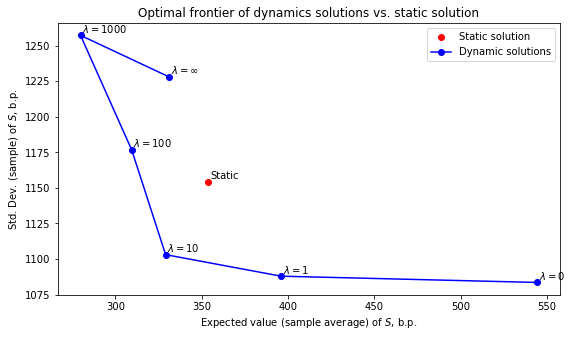

In [21]:
# redo the ordering
solutions = [el for el in dataset.columns if el.find('Sol')>-1]

labels = ['Static',
 '$\lambda = 0$',
 '$\lambda = 1$',
 '$\lambda = 10$',
 '$\lambda = 100$',
'$\lambda = 1000$',
'$\lambda = \infty$'
]

Es = [result_DF['Stilde_' + el].mean()*10000 for el in solutions]
Stds = [result_DF['Stilde_' + el].std()*10000 for el in solutions]
figure(figsize=(9,5))
plot(Es[0], Stds[0], 'ro')
plot(np.array(Es[1:]), Stds[1:], 'b-o')
for i in range(len(solutions)):
    annotate(labels[i], (Es[i]+10E-1, Stds[i]+20E-1))
    # annotate(labels[i], (Es[i]-1E-3, Stds[i]+2E-2))
    print '%s\nExpected Value:%10.8f' % (labels[i], Es[i]), 'Standard Deviation:%10.8f' % Stds[i]
       
#xlim([-.62, -0.52])
#ylim([5.95, 7.0])
title('Optimal frontier of dynamics solutions vs. static solution')
ylabel('Std. Dev. (sample) of $S$, b.p.')
xlabel('Expected value (sample average) of $S$, b.p.')
legend(['Static solution', 'Dynamic solutions'])
savefig(GRAPHICSFOLDER+'optimal_frontier_graph.pdf')

Populating the interactive namespace from numpy and matplotlib
Static
Expected Value:4.37256909 Standard Deviation:15.42591830
$\lambda = 0$
Expected Value:3.45439136 Standard Deviation:15.28745142
$\lambda = 1$
Expected Value:3.99442682 Standard Deviation:14.68659057
$\lambda = 10$
Expected Value:4.23450636 Standard Deviation:14.80413426
$\lambda = 100$
Expected Value:4.36835773 Standard Deviation:14.83665580
$\lambda = 1000$
Expected Value:4.45880773 Standard Deviation:14.81022327
$\lambda = \infty$
Expected Value:4.54756500 Standard Deviation:14.78377372


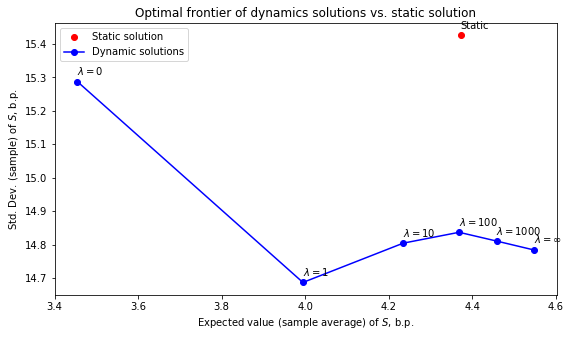

In [23]:
# redo the ordering
%pylab inline
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

result_DF_1 = pd.read_csv(PROCESSEDDATAFOLDER + 'result_DF_1.csv')

solutions = [el for el in dataset.columns if el.find('Sol')>-1]

labels = ['Static',
 '$\lambda = 0$',
 '$\lambda = 1$',
 '$\lambda = 10$',
 '$\lambda = 100$',
'$\lambda = 1000$',
'$\lambda = \infty$'
]

Es = [result_DF_1['Stilde_' + el].mean()*10000 for el in solutions]
Stds = [result_DF_1['Stilde_' + el].std()*10000 for el in solutions]
figure(figsize=(9,5))
plot(Es[0], Stds[0], 'ro')
plot(np.array(Es[1:]), Stds[1:], 'b-o')
for i in range(7):
    annotate(labels[i], (Es[i]-1E-3, Stds[i]+2E-2))
    print '%s\nExpected Value:%10.8f' % (labels[i], Es[i]), 'Standard Deviation:%10.8f' % Stds[i]
    
#xlim([-.62, -0.52])
#ylim([5.95, 7.0])
title('Optimal frontier of dynamics solutions vs. static solution')
ylabel('Std. Dev. (sample) of $S$, b.p.')
xlabel('Expected value (sample average) of $S$, b.p.')
legend(['Static solution', 'Dynamic solutions'])
savefig(GRAPHICSFOLDER+'optimal_frontier_graph.pdf')

# Testing time length effect